In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn-paper')
import seaborn as sns
import joblib
import numpy as np
import pandas as pd
plt.rcParams['font.family']='Times New Roman,Microsoft YaHei'# 设置字体族，中文为微软雅黑，英文为Times New Roman
plt.rcParams['mathtext.fontset'] = 'stix' # 设置数学公式字体为stix
import pickle
from matplotlib.ticker import FuncFormatter, MaxNLocator
from econml.dml import DML

C:\Users\aa271\AppData\Local\Temp\ipykernel_26380\3142875819.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


In [2]:
columnnameen = ['Isoprene',
    '1,3-Butadiene',
    'Butene',
    'Pentene',
                'NOx',
                'O$_3$',
                'PM$_1$',
                'SO$_2$',
                'Radiation',
                'Temperature',
                'Humidity',
                'TICCLabel',
                'Month',
                'KMeansLabel']
columnname = [
   'Isoprene',
    '1,3-Butadiene',
    'Butene',
    'Pentene',
    'NOx',
    'O3',
    'PM1',
    'SO2',
    'Radiation',
    'Temperature',
    'Humidity',
    'TICCLabel',
    "Place",
    'Month',
    'KMeansLabel'
]

Xcolname=[   'NOx',
    f'O$_3$',
    f'SO$_2$',
    'Radiation',
    'Temperature',
    'Humidity',
            ]

Tname = ['Isoprene',
    '1,3-Butadiene',
    'Butene',
    'Pentene']
yname = ['PM1']
Xname = ['NOx',
         'O3',
         'SO2',
         'Radiation',
         'Temperature',
         'Humidity', ]
Wname = ["Place",
         'Month',
         'KMeansLabel']

In [3]:
data = pd.read_excel("dataDMLnoscale.xlsx", index_col=0)

In [4]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler


# data=grouped_data
data.columns=columnname
X=data[Xname]
T=data[Tname]
y=np.array(data[yname]).ravel()
Dummy=[pd.get_dummies(data[i], prefix=i,drop_first=True) for i in Wname]
W=pd.concat([Dummy[0],Dummy[1],Dummy[2]], axis=1)

# Use StandardScaler to normalize X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=Xname)

In [5]:
from sklearn.model_selection import train_test_split

# 将数据集分割为训练集和测试集（例如，80% 训练，20% 测试）
X_train, X_test, T_train, T_test, W_train, W_test, y_train, y_test = train_test_split(
    X_scaled, T, W, y, test_size=0.2, random_state=42
)

In [6]:
N=100
# Redefine columnname from the data columns

# Set the numerical and categorical columns
numerical_cols = columnname[:-4]  # All columns except the last three
categorical_cols = columnname[-4:]  # Last three columns

# Process the numerical columns
grouped_numerical = data[numerical_cols].groupby(data.index // N).mean()

# Process the categorical columns by taking the mode (most frequent category)
grouped_categorical = data[categorical_cols].groupby(data.index // N).agg(lambda x: x.value_counts().index[0])
# Concatenate the results
grouped_data = pd.concat([grouped_numerical, grouped_categorical], axis=1)
grouped_data  # Display the first few rows for review

,Isoprene,"1,3-Butadiene",Butene,Pentene,NOx,O3,PM1,SO2,Radiation,Temperature,Humidity,TICCLabel,Place,Month,KMeansLabel
0,0.881090,1.010635,5.393510e-02,0.988656,10.428405,37.177832,12.257036,3.067605,64.119847,36.754208,52.499893,0,jh,Aug,2
1,1.262956,1.128855,3.689550e-02,0.949143,11.074086,37.157414,12.276320,3.125403,64.047270,36.907072,51.847514,0,jh,Aug,2
2,2.083844,1.817602,3.228159e-02,1.050890,12.905757,37.050176,12.038862,3.155871,65.795071,37.128293,51.003761,0,jh,Aug,2
3,2.549291,2.081424,2.118316e-02,1.028331,16.659267,36.539428,11.782565,3.200387,66.676215,37.295751,50.780217,0,jh,Aug,2
4,3.343836,2.686600,1.755135e-02,0.877685,18.814739,35.641212,11.694759,3.140256,64.744376,37.411963,49.857121,0,jh,Aug,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,0.354616,0.138405,2.107392e-06,0.025779,9.170253,14.187323,7.986496,1.636592,2.902240,36.538729,68.964930,2,cm,Jul,3
760,0.211706,0.075549,5.643864e-07,0.016007,9.028027,14.697054,8.071382,1.601828,2.857642,36.577462,68.626929,1,cm,Jul,0
761,0.165637,0.036045,1.516268e-07,0.014985,8.749564,15.456783,7.894414,1.595893,2.779604,36.597782,68.354997,1,cm,Jul,0
762,0.134946,0.026673,4.269382e-08,0.011391,8.577168,15.545317,7.553738,1.586209,2.751141,36.610351,68.346419,1,cm,Jul,0


In [7]:
estimator=joblib.load("estimator_train.pkl")

In [9]:
from econml.cate_interpreter import SingleTreeCateInterpreter
intrp = SingleTreeCateInterpreter(include_model_uncertainty=True, max_depth=3, min_samples_leaf=10)
# We interpret the CATE model's behavior based on the features used for heterogeneity
intrp.interpret(estimator, X_test)

from sklearn.tree import export_graphviz
import graphviz

# 使用 SingleTreeCateInterpreter 导出决策树
dot_data = intrp.export_graphviz(feature_names=Xname)

# 修改为从左到右的绘制方向并缩小节点之间的间距
dot_data_modified = dot_data.replace("digraph Tree {", 'digraph Tree { rankdir=LR; nodesep=0.2; ranksep=0.5;')

# 添加颜色设置
color_settings = '''
node [color=lightblue, style=filled];  # 设置节点颜色为浅蓝色并填充
edge [color=gray];  # 设置边的颜色为灰色
'''


# 添加 LaTeX 设置
dot_data_latex = 'digraph Tree {\n'
dot_data_latex += 'graph [nodesep=0.2, ranksep=0.5, rankdir=LR, dpi=300];\n'
dot_data_latex += 'node [shape=plaintext, fontname=helvetica, fontsize=10];\n'
dot_data_latex += color_settings
dot_data_latex += dot_data_modified.split('{', 1)[1]

# 使用 graphviz 渲染决策树
graph = graphviz.Source(dot_data_latex)
graph.render("tree_horizontal_latex", format='svg')  # 将决策树保存为 "tree_horizontal_latex.svg"
graph.view("tree_horizontal_latex")    # 打开并查看决策树

'tree_horizontal_latex.pdf'

In [10]:
from io import StringIO

# 获取 HTML 格式的摘要
# 获取 HTML 格式的摘要
html_content = estimator.summary(feature_names=Xname, treatment_names=Tname).as_html()

# 使用 pandas 读取 HTML 内容
dfs = pd.read_html(StringIO(html_content))

print(len(dfs))
# 通常，pd.read_html 返回一个 DataFrame 列表，因为一个 HTML 页面可能包含多个表格。
# 我们可以查看列表中的每一个 DataFrame，找到我们需要的表格。
for i,df in enumerate(dfs):
    df.to_excel("summary"+str(i)+".xlsx")

2


In [42]:
# 获取 SHAP 值
shap_values = estimator.shap_values(X_test)

In [50]:
# 可视化 SHAP 值
import shap

In [44]:
from matplotlib.colors import LinearSegmentedColormap
# 定义从蓝色到红色的渐变
colors = [(0, "#75809C"), (1, "#B95756")]
# 创建 colormap
cm = LinearSegmentedColormap.from_list("BlueRed", colors)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


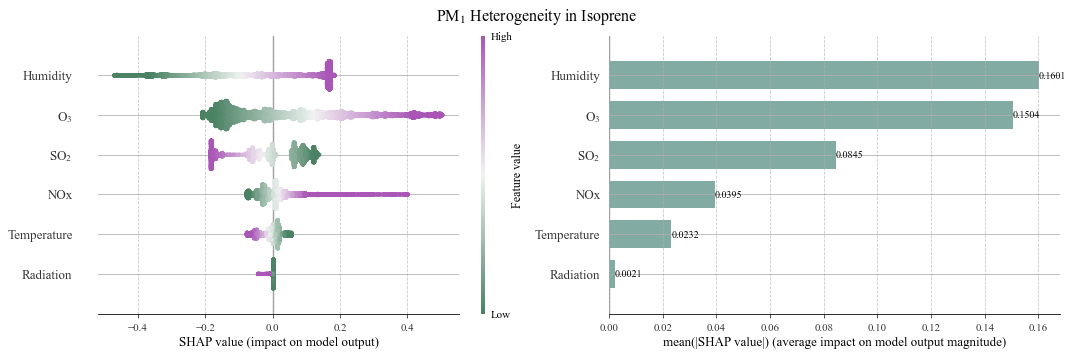

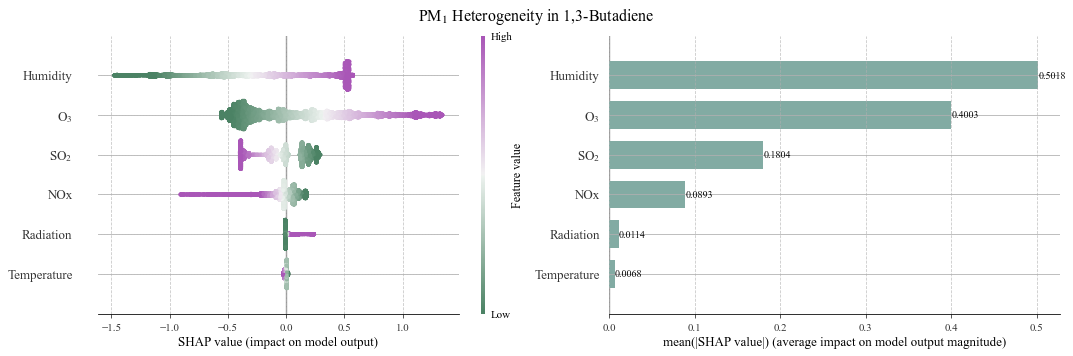

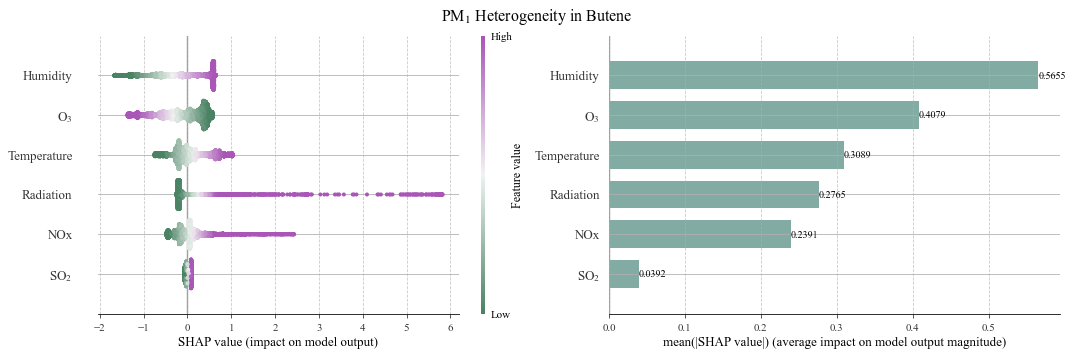

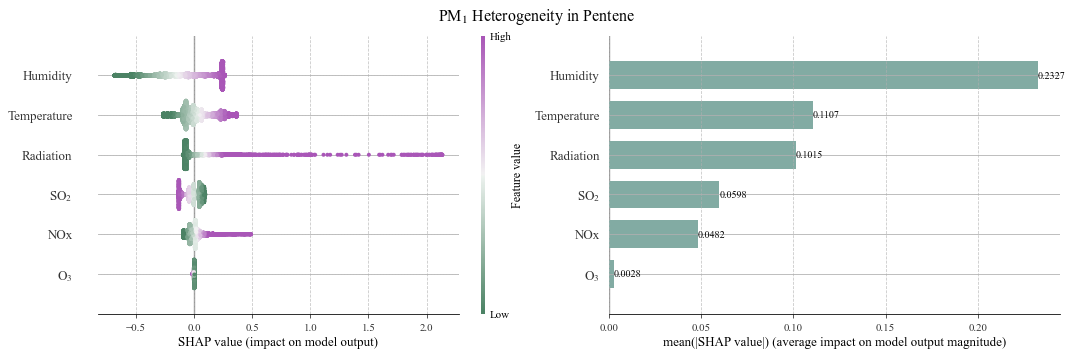

In [66]:

def plot_shap_for_treatment(shap_values_dict, treatment_name, X, feature_names, cmap):
    """
    Plot SHAP values for a given treatment.

    Parameters:
    - shap_values_dict: Dictionary of SHAP values.
    - treatment_name: The name of the treatment to be plotted.
    - X: Features.
    - feature_names: Names of the features.
    - cmap: colormap for the SHAP values.
    """
    # Extract SHAP values for the given treatment
    shap_values_y = shap_values_dict['Y0']
    shap_values_final = shap_values_y[treatment_name]

    fig, ax = plt.subplots(1, 2, figsize=(20, 15))

    # Left plot
    plt.sca(ax[0])
    shap.summary_plot(shap_values_final, X, feature_names=feature_names, cmap=cmap, show=False, plot_size=(15, 5))
    plt.grid(axis='x',linestyle='--',alpha=0.7)
    plt.grid(axis='y')

    # Right plot
    plt.sca(ax[1])
    shap.summary_plot(shap_values_final, X, plot_type="bar", feature_names=feature_names, show=False, color='#82ABA3', plot_size=(15, 5))
    plt.grid(axis='x',linestyle='--',alpha=0.7)
    plt.grid(axis='y')

    # Add labels to the horizontal bar plot
    bars = [rect for rect in ax[1].get_children() if isinstance(rect, plt.Rectangle)]
    for bar in bars[:-1]:  # The last rectangle is the background
        xval = bar.get_width()
        plt.text(xval, bar.get_y() + bar.get_height()/2, round(xval, 4), ha='left', va='center', fontsize=10)

    # Title
    plt.suptitle(f'PM$_1$ Heterogeneity in {treatment_name}', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.90)
    # plt.show()

cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True)
# Plot for each treatment
for treatment in Tname:
    plot_shap_for_treatment(shap_values, treatment, X_test, Xcolname, cmap=cmap)
    plt.savefig(f'PM$_1$ Heterogeneity in {treatment}.svg')
    plt.show()

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
# 定义从蓝色到红色的渐变
colors = [(0, "#75809C"), (1, "#B95756")]
# 创建 colormap
cm = LinearSegmentedColormap.from_list("BlueRed", colors)

In [12]:
print(Xp)

         NOx        O3       SO2  Radiation  Temperature  Humidity
0   1.038877  1.453757 -0.615590   0.877251     1.679484 -2.153868
1   1.047246  1.794112 -0.711088  -0.025535     1.180666 -1.638398
2   1.209780  0.498693 -0.862248  -0.350451     0.192299 -0.647619
3   0.632352 -0.276182 -0.974695  -0.395025    -0.242180 -0.041324
4   3.073351 -0.980001 -0.967885  -0.366091    -0.584306  0.678773
5   2.146604  1.006234 -0.828451   0.573892     0.731325 -0.906379
6   0.198702  0.414364  0.203534   0.982192    -0.322171 -0.920093
7  -0.582187  0.521243  0.744206   0.408911    -0.701837 -0.733497
8  -0.788556 -0.315901  0.641485  -0.366509    -1.293581  0.281963
9  -1.232229 -0.810835  0.580068  -0.377067    -1.591614  0.968581
10 -1.370897 -1.123804  0.490947  -0.317871    -1.900613  0.963641
11 -1.296026 -0.467521  0.444651   3.047500    -1.285206 -0.265336
12 -0.851679  0.645625  0.299087   1.298417    -0.271906 -1.477737
13 -0.140503 -0.303800  0.136405  -0.086566    -0.274195 -0.48

In [53]:
# from statsmodels.nonparametric.smoothers_lowess import lowess
# import numpy as np
#
# Xgroup = pd.DataFrame(StandardScaler().fit_transform(grouped_data[Xname]), columns=Xname)
# Tgroup=grouped_data[Tname]
#
# # 获取每个观察值的处理效应
# effects = estimator.marginal_effect(X=Xgroup,T=Tgroup)
# lb, ub = estimator.marginal_effect_interval(X=Xgroup,T=Tgroup,alpha=0.05)
#
# # 获取X的数量
# n = Xgroup.shape[1]
#
# def find_zero_crossings(y_values, x_values):
#     zero_crossings = []
#     for i in range(1, len(y_values)):
#         if y_values[i-1] * y_values[i] < 0:  # A crossing occurs
#             zero_crossings.append(x_values[i])
#     return zero_crossings
#
# # 遍历每个T
# for i in range(4):
#     # 创建子图，每个T有6个子图，对应每个X
#     fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
#     fig.suptitle(f'Effects of {Tname[i]} on PM$_1$', fontsize=18)
#
#     # 对于当前的T, 遍历每个X
#     for j in range(n):
#         row = j // 3  # 获取行索引
#         col = j % 3   # 获取列索引
#         ax = axes[row, col]
#
#         # 对 Xgroup、effects、lb 和 ub 进行排序
#         sorted_indices = Xgroup.iloc[:, j].argsort()
#         sorted_x = Xgroup.iloc[sorted_indices, j]
#         sorted_effects = effects[sorted_indices, i]
#         sorted_lb = lb[sorted_indices, i]
#         sorted_ub = ub[sorted_indices, i]
#
#         # 使用LOWESS进行平滑
#         smoothed = lowess(sorted_effects, sorted_x)
#
#         # 依据与y=0的距离调整散点的大小
#         sizes = np.abs(sorted_effects)*100
#         # 散点图
#         # ax.scatter(sorted_x, sorted_effects, c='#A1B0AD', marker='o', s=sizes, alpha=0.05)
#         ax.plot(smoothed[:, 0], smoothed[:, 1], color='#2A4C65', linestyle='--')  # 平滑的均值线
#         # ax.fill_between(sorted_x, sorted_lb, sorted_ub, color='#2A4C65', alpha=0.1)  # 置信区间
#
#         # 查找y=0交点并绘制垂直线
#         zero_crossings = find_zero_crossings(smoothed[:, 1], smoothed[:, 0])
#         for zc in zero_crossings:
#             ax.axvline(zc, color='#BECBD3', linestyle=':')
#             ax.text(zc, ax.get_ylim()[1]*0.9, f'{zc:.2f}', color='#1F2C1C', rotation=90, verticalalignment='top')
#
#         ax.set_title(f'Effects of {Tname[i]} for {Xcolname[j]}',fontsize=14)
#         ax.set_xlabel(f'{Xcolname[j]}',fontsize=13)
#         ax.set_ylabel('$\partial τ(T, X)$',fontsize=13)
#         ax.tick_params(axis='both', labelsize=11)
#         ax.grid(True)
#
#     plt.tight_layout()
#     plt.subplots_adjust(top=0.85)
#     # plt.savefig(f'Effects of {Tname[i]} on PM$_1$.svg')
#     plt.show()

In [ ]:
# from statsmodels.nonparametric.smoothers_lowess import lowess
# import numpy as np
#
# Xgroup = pd.DataFrame(StandardScaler().fit_transform(grouped_data[Xname]), columns=Xname)
# Tgroup=grouped_data[Tname]
#
# # 获取每个观察值的处理效应
# effects = estimator.marginal_effect(X=Xgroup,T=Tgroup)
# lb, ub = estimator.marginal_effect_interval(X=Xgroup,T=Tgroup,alpha=0.05)
#
# # 获取X的数量
# n = Xgroup.shape[1]
#
# def find_zero_crossings(y_values, x_values):
#     zero_crossings = []
#     for i in range(1, len(y_values)):
#         if y_values[i-1] * y_values[i] < 0:  # A crossing occurs
#             zero_crossings.append(x_values[i])
#     return zero_crossings
#
# # 遍历每个T
# for i in range(4):
#     # 创建子图，每个T有6个子图，对应每个X
#     fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
#     fig.suptitle(f'Effects of {Tname[i]} on PM$_1$', fontsize=18)
#
#     # 对于当前的T, 遍历每个X
#     for j in range(n):
#         row = j // 3  # 获取行索引
#         col = j % 3   # 获取列索引
#         ax = axes[row, col]
#
#         # 对 Xgroup、effects、lb 和 ub 进行排序
#         sorted_indices = Xgroup.iloc[:, j].argsort()
#         sorted_x = Xgroup.iloc[sorted_indices, j]
#         sorted_effects = effects[sorted_indices, i]
#         sorted_lb = lb[sorted_indices, i]
#         sorted_ub = ub[sorted_indices, i]
#
#         # 使用LOWESS进行平滑
#         smoothed = lowess(sorted_effects, sorted_x)
#
#         # 依据与y=0的距离调整散点的大小
#         sizes = np.abs(sorted_effects)*100
#         # 散点图
#         ax.plot(smoothed[:, 0], smoothed[:, 1], color='#2A4C65', linestyle='--',linewidth=2)  # 平滑的均值线
#
#
#         #特定x不为0
#         X_new_range = np.linspace(Xgroup.min()[j] , Xgroup.max()[j] , 100)  # New X range for the specific X
#         # Create the X_new matrix for the current X
#         X_new = np.zeros((100, Xgroup.shape[1]))  # n is the number of X columns
#         X_new[:, j] = X_new_range
#
#         T_mean = Tgroup.min().values  # 计算每列的均值
#         T_repeated = np.repeat(T_mean.reshape(1, -1), 100, axis=0)
#         effects_new = estimator.marginal_effect(X=X_new, T=T_repeated)
#         # 计算新X值范围的效应的置信区间
#         lb_new, ub_new = estimator.marginal_effect_interval(X=X_new, T=T_repeated, alpha=0.05)
#
#         # Plot the new effects for the specific X value
#         ax.plot(X_new_range, effects_new[:, i], color='#CC5F5A', linestyle='-',linewidth=1.5)  # New effects line for specific X
#         ax.fill_between(X_new_range, lb_new[:, i], ub_new[:, i], color='#CC5F5A', alpha=0.3)
#
#
#         #设置刻度
#         ax.tick_params(axis='both', labelsize=14)
#
#         def format_ticks(x, pos):
#             return f'{x:.2f}'  # 这里设置为保留两位小数，您可以根据需要进行修改
#         # 设置x轴刻度的格式
#         ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))
#         ax.yaxis.set_major_locator(MaxNLocator(nbins=6))
#         ax.xaxis.set_major_formatter(FuncFormatter(format_ticks))
#         ax.xaxis.set_major_locator(MaxNLocator(nbins=8))
#
#         # 查找y=0交点并绘制垂直线
#         zero_crossings = find_zero_crossings(smoothed[:, 1], smoothed[:, 0])
#         for zc in zero_crossings:
#             ax.axvline(zc, color='#BECBD3', linestyle=':')
#             ax.text(zc, ax.get_ylim()[1]*0.9, f'{zc:.2f}', color='#1F2C1C', rotation=90, verticalalignment='top')
#
#         ax.set_title(f'Effects of {Tname[i]} for {Xcolname[j]}',fontsize=14)
#         ax.set_xlabel(f'{Xcolname[j]}',fontsize=13)
#         ax.set_ylabel('$\partial τ(T, X)$',fontsize=13)
#         ax.tick_params(axis='both', labelsize=11)
#         ax.grid(True)
#
#     plt.tight_layout()
#     plt.subplots_adjust(top=0.85)
#     # plt.savefig(f'Effects of {Tname[i]} on PM$_1$.svg')
#     plt.show()

In [72]:
effects = estimator.marginal_effect(X=X_scaled,T=T)
data["effect"]=effects.sum(axis=1)
for j,i in enumerate(Tname):
    data["effect "+i]=effects[:,j]

In [73]:
clusterDML = ['异戊二烯浓度', '1,3-丁二烯浓度', '甲苯浓度', '二甲苯、乙苯浓度', 'NOx', 'O3', 'PM1', 'SO2', '地面层净辐射', '地面层温度', '地面层湿度']
#金海
Month = ["Aug", "Sept", "Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul"]
#金海的合并
datajh = joblib.load("datanpjh.pkl")
datadicjh = joblib.load("datanpjh.pkl")
dataTVOCjh = joblib.load("TVOCjh")
dataTVOCVMDtempjh = pd.DataFrame(joblib.load("dataTVOCVMDjh.pkl"))
datatempjh = joblib.load('dataVMDjh.pkl')
datatempmjh = []
dataTVOCVMDjh = []
A = 0
B = 0
for i in range(len(datajh)):
    A = A + datadicjh[i].shape[0]
    datatempmjh.append(datatempjh.loc[B:(A - 1)].reset_index(drop=True))
    dataTVOCVMDjh.append(dataTVOCVMDtempjh.loc[B:(A - 1)].reset_index(drop=True))
    B = B + datadicjh[i].shape[0]
#崇明
#崇明的合并
datacm = joblib.load("datanpcm.pkl")
datadiccm = joblib.load("datanpcm.pkl")
dataTVOCcm = joblib.load("TVOCcm")
dataTVOCVMDtempcm = pd.DataFrame(joblib.load("dataTVOCVMDcm.pkl"))
datatempcm = joblib.load('dataVMDcm.pkl')
dataTVOCVMDcm = []
datatempmcm = []
A = 0
B = 0
for i in range(len(datacm)):
    A = A + datadiccm[i].shape[0]
    datatempmcm.append(datatempcm.loc[B:(A - 1)].reset_index(drop=True))
    dataTVOCVMDcm.append(dataTVOCVMDtempcm.loc[B:(A - 1)].reset_index(drop=True))
    B = B + datadiccm[i].shape[0]
monthchoose = [Month.index("Aug"), Month.index("Jun"), Month.index("Jul")]
place = ["jh", "cm"]

In [74]:
datajhtime=pd.DataFrame(columns=["Time"])
datacmtime=pd.DataFrame(columns=["Time"])
# 遍历两个地点
for p, m in enumerate(monthchoose):
    dt=pd.DataFrame()
    dt["Time"]=datajh[m].index
    if dt.shape[0] != datatempmjh[m].shape[0]:
        # 将较长的数据截断为较短的长度
        min_length = min(dt.shape[0], datatempmjh[m].shape[0])
        dt = dt.iloc[:min_length]
    datajhtime=pd.concat([datajhtime,dt],axis=0)
    dt=pd.DataFrame()
    dt["Time"]=datacm[m].index
    if dt.shape[0] != datatempmcm[m].shape[0]:
        # 将较长的数据截断为较短的长度
        min_length = min(dt.shape[0], datatempmcm[m].shape[0])
        dt = dt.iloc[:min_length]
    datacmtime=pd.concat([datacmtime,dt],axis=0)

datatime=pd.concat([datajhtime,datacmtime],axis=0)
data["Time"]=datatime["Time"].values

In [75]:
data["Hour_Min"] = data["Time"].apply(lambda x: x.strftime('%H:%M'))
data["Hour"] = data["Time"].apply(lambda x: x.strftime('%H')).astype("int")
datap=data.groupby("Hour_Min").mean().reset_index()
datap2=data.groupby("Hour").mean().reset_index()
datap3=data.groupby("Hour").max().reset_index()

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


In [76]:
print(data.effect.max())
print(data.effect.max()/data.PM1[data.effect.idxmax()])

6.402033104374821
0.2582282429203332



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Cluster 0 range: O3 (33.49411446587617, 62.08649812578771), NOx (7.708453047960711, 17.95903465717268), SO2 (2.710145916649365, 8.025524293982802)
Cluster 0 range: O3 (45.95, 59.10), NOx (7.35, 12.27), SO2 (3.85, 8.38)
Cluster 1 range: O3 (4.543281161451969, 41.44257143374509), NOx (0.152339410168879, 11.48354379932881), SO2 (2.922465509602683, 8.025243205982115)
Cluster 1 range: O3 (16.08, 29.11), NOx (3.40, 6.82), SO2 (4.66, 6.63)
Cluster 2 range: O3 (9.287467559421716, 41.17519486027008), NOx (0.2670285353700436, 12.16809573008713), SO2 (2.891424403935493, 5.833452002592231)
Cluster 2 range: O3 (21.36, 37.04), NOx (0.25, 5.56), SO2 (4.41, 5.65)


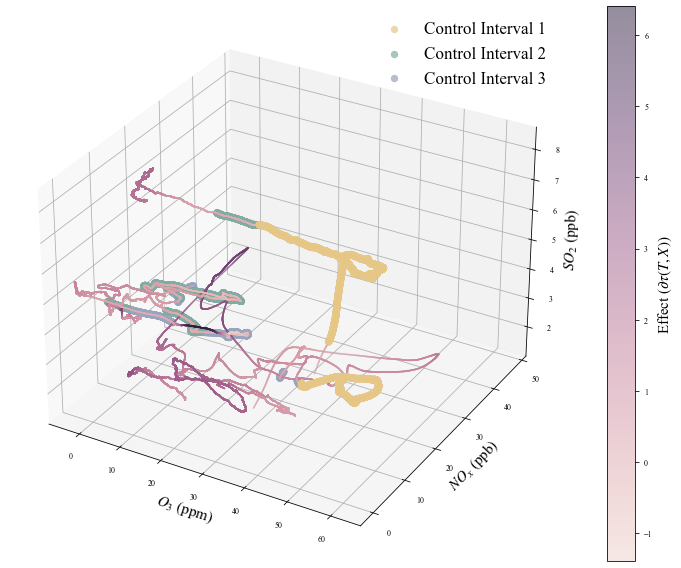

In [80]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import combinations,product
from scipy.spatial import ConvexHull



# 颜色列表
colorc = ["#E6C786", "#82ABA3","#97A5C0"]


# 计算effect的均值和标准差，确定阈值
effect_mean = data['effect'].mean()
effect_std = data['effect'].std()
threshold = effect_mean - effect_std

# 筛选出符合条件的数据点
filtered_data = data[data['effect'] < threshold]

# 创建3D散点图
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(111, projection='3d')

# 所有数据点
sc = ax.scatter(data['O3'], data['NOx'], data['SO2'], alpha=0.5, c=data['effect'], cmap=sns.cubehelix_palette(as_cmap=True),s=2)

# Mean Shift聚类
if not filtered_data.empty:
    bandwidth = estimate_bandwidth(filtered_data[['O3', 'NOx', 'SO2',"Radiation","Temperature","Humidity"]], quantile=0.2)
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(filtered_data[['O3', 'NOx', 'SO2',"Radiation","Temperature","Humidity"]])
    filtered_data['cluster'] = ms.labels_



    # 绘制每个聚类的点
    for cluster in set(filtered_data['cluster']):
        cluster_data = filtered_data[filtered_data['cluster'] == cluster]
        ax.scatter(cluster_data['O3'], cluster_data['NOx'], cluster_data['SO2'], color=colorc[cluster], alpha=0.7, label=f"Control Interval {cluster + 1}",s=50)

        # 计算并绘制边界框
        if len(cluster_data) > 1:
            max_vals = cluster_data[['O3', 'NOx', 'SO2']].max()
            min_vals = cluster_data[['O3', 'NOx', 'SO2']].min()


        # 打印每个聚类的取值范围
        print(f"Cluster {cluster} range: O3 ({min_vals['O3']}, {max_vals['O3']}), NOx ({min_vals['NOx']}, {max_vals['NOx']}), SO2 ({min_vals['SO2']}, {max_vals['SO2']})")

        # 计算均值和标准差
        mean_vals = cluster_data[['O3', 'NOx', 'SO2']].mean()
        std_vals = cluster_data[['O3', 'NOx', 'SO2']].std()

        # 计算取值范围
        min_vals = mean_vals - std_vals
        max_vals = mean_vals + std_vals

        # 打印每个聚类的取值范围
        print(f"Cluster {cluster} range: O3 ({min_vals['O3']:.2f}, {max_vals['O3']:.2f}), "
              f"NOx ({min_vals['NOx']:.2f}, {max_vals['NOx']:.2f}), "
              f"SO2 ({min_vals['SO2']:.2f}, {max_vals['SO2']:.2f})")



# 设置视角
# ax.view_init(elev=30, azim=10)

# 添加颜色条
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Effect ($\partial τ(T, X)$)',fontsize=15)

# 添加标签和图例
ax.set_xlabel('$O_3$ (ppm)',fontsize=15)
ax.set_ylabel('$NO_x$ (ppb)',fontsize=15)
ax.set_zlabel('$SO_2$ (ppb)',fontsize=15)
ax.legend(fontsize=17, frameon=False)

# 添加网格线
ax.grid(True)

# 使用紧凑布局
plt.tight_layout()

fig.savefig("inter.png", bbox_inches='tight',dpi=800)
plt.show()

In [148]:
print(effect_mean,effect_std)

1.3323078320848025 1.2531012442174727


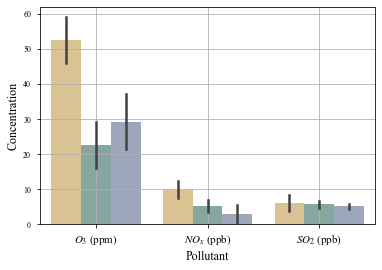

In [84]:
# 将数据转换为长格式
long_format_data = filtered_data.melt(id_vars=['cluster'], value_vars=['O3', 'NOx', 'SO2'],
                                      var_name='Pollutant', value_name='Concentration')
# 重新命名污染物名称
pollutant_rename = {'O3': '$O_3$ (ppm)', 'NOx': '$NO_x$ (ppb)', 'SO2': '$SO_2$ (ppb)'}
long_format_data['Pollutant'] = long_format_data['Pollutant'].replace(pollutant_rename)

# 使用Seaborn绘制条形图
plt.figure(figsize=(6, 4))
bar_plot=sns.barplot(x='Pollutant', y='Concentration', hue='cluster', data=long_format_data, errorbar='sd',palette=colorc)
plt.title('')
plt.xlabel('Pollutant',fontsize=12)
plt.ylabel('Concentration',fontsize=12)
# 修改刻度标签大小
plt.xticks(fontsize=11)  # 修改x轴刻度标签大小
plt.grid()
# 移除图例
bar_plot.legend_.remove()

plt.savefig("控制浓度.svg", bbox_inches='tight')
plt.show()

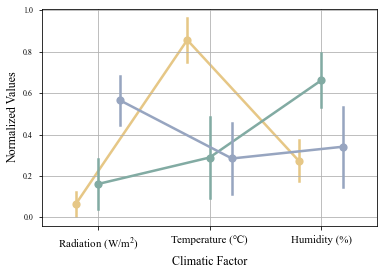

In [88]:


# 将数据转换为长格式

filtered_data2=filtered_data.copy()
filtered_data2[["Radiation","Temperature","Humidity"]]=MinMaxScaler().fit_transform(filtered_data2[["Radiation","Temperature","Humidity"]])


long_format_data = filtered_data2.melt(id_vars=['cluster'], value_vars=["Radiation","Temperature","Humidity"],
                                      var_name='Climatic Factor', value_name='Normalized Values')

# 重新命名气候因子名称
factor_rename = {
    "Radiation": "Radiation (W/m$^2$)",
    "Temperature": "Temperature (℃)",
    "Humidity": "Humidity (%)"
}
long_format_data['Climatic Factor'] = long_format_data['Climatic Factor'].replace(factor_rename)
# 使用Seaborn绘制条形图
plt.figure(figsize=(6, 4))
bar_plot=sns.pointplot(x='Climatic Factor', y='Normalized Values', hue='cluster', data=long_format_data, errorbar='sd',palette=colorc, dodge=0.4)
plt.title('')
plt.xlabel('Climatic Factor',fontsize=12)
plt.ylabel('Normalized Values',fontsize=12)
# 修改刻度标签大小
plt.xticks(fontsize=11)  # 修改x轴刻度标签大小
plt.grid()
# 移除图例
bar_plot.legend_.remove()

plt.savefig("控制浓度2.svg", bbox_inches='tight')
plt.show()

In [53]:
filtered_data

,Isoprene,"1,3-Butadiene",Butene,Pentene,NOx,O3,PM1,SO2,Radiation,Temperature,...,KMeansLabel,effect,effect Isoprene,"effect 1,3-Butadiene",effect Butene,effect Pentene,Time,Hour_Min,Hour,cluster
0,0.824809,1.023420,0.060390,1.020860,10.398318,37.210485,12.171348,3.061825,56.636985,36.724194,...,2,0.044248,0.066935,0.042092,-0.166126,0.101347,2022-08-05 11:25:46,11:25,11,1
1,0.824966,1.023651,0.060402,1.020763,10.398269,37.210187,12.171461,3.061805,56.642700,36.724215,...,2,0.044353,0.066930,0.042087,-0.166040,0.101376,2022-08-05 11:25:53,11:25,11,1
2,0.825225,1.024082,0.060421,1.020372,10.398206,37.209573,12.171639,3.061767,56.654085,36.724259,...,2,0.044566,0.066922,0.042077,-0.165867,0.101435,2022-08-05 11:26:00,11:26,11,1
3,0.825264,1.024721,0.060458,1.019937,10.398165,37.208622,12.171892,3.061712,56.671141,36.724324,...,2,0.044887,0.066909,0.042058,-0.165604,0.101524,2022-08-05 11:26:07,11:26,11,1
4,0.824389,1.025512,0.060511,1.019362,10.398151,37.207335,12.172202,3.061642,56.693861,36.724411,...,2,0.045316,0.066892,0.042032,-0.165250,0.101643,2022-08-05 11:26:14,11:26,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51608,2.896673,2.311179,1.771957,0.716179,8.027606,50.458987,9.809311,5.077063,1.367624,34.637164,...,0,0.069521,0.306728,0.847344,-0.994635,-0.089916,2022-08-07 18:54:57,18:54,18,0
51609,2.885625,2.305653,1.795462,0.722719,8.024978,50.431970,9.797865,5.067513,1.370391,34.628781,...,0,0.071848,0.307190,0.848420,-0.994195,-0.089567,2022-08-07 18:55:04,18:55,18,0
51610,2.874964,2.300240,1.819297,0.729384,8.022192,50.404450,9.786190,5.057917,1.373196,34.620273,...,0,0.074175,0.307652,0.849498,-0.993755,-0.089220,2022-08-07 18:55:11,18:55,18,0
51611,2.864270,2.294584,1.843452,0.736213,8.019238,50.376424,9.774249,5.048263,1.376037,34.611637,...,0,0.076504,0.308113,0.850580,-0.993315,-0.088874,2022-08-07 18:55:18,18:55,18,0


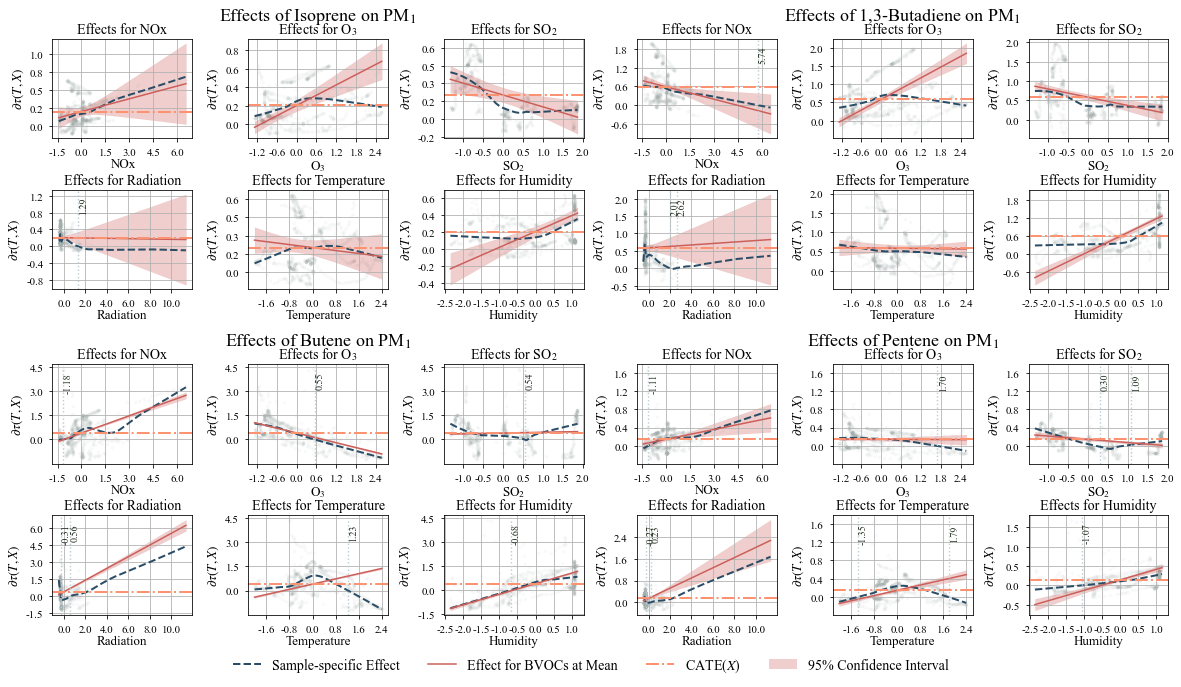

In [13]:
from statsmodels.nonparametric.smoothers_lowess import lowess
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

Xgroup = pd.DataFrame(StandardScaler().fit_transform(grouped_data[Xname]), columns=Xname)
Tgroup=grouped_data[Tname]

# 获取每个观察值的处理效应
effects = estimator.marginal_effect(X=Xgroup,T=Tgroup)
lb, ub = estimator.marginal_effect_interval(X=Xgroup,T=Tgroup,alpha=0.05)

Inter=ate = estimator.marginal_ate(X=Xgroup, T=Tgroup)

# 获取X的数量
n = Xgroup.shape[1]

def find_zero_crossings(y_values, x_values, threshold=0.02):
    zero_crossings = []
    i = 0
    while i < len(y_values) - 1:
        if y_values[i] * y_values[i+1] < 0:  # A crossing occurs
            zero_crossings.append(x_values[i+1])
            # Skip values until we're out of the threshold range
            while i < len(x_values) - 1 and abs(x_values[i+1] - x_values[i]) <= threshold:
                i += 1
        i += 1

    return zero_crossings


# 创建一个2x2的大图
fig = plt.figure(figsize=(20, 10))
outer_grid = fig.add_gridspec(2, 2, wspace=0.1, hspace=0.3)

for i in range(4):
    inner_grid = outer_grid[i//2, i%2].subgridspec(2, 3, wspace=0.4, hspace=0.52)

    # 这里是我们为当前的 T 设置一个主标题
    ax = fig.add_subplot(outer_grid[i//2, i%2])
    ax.set_title(f'Effects of {Tname[i]} on PM$_1$', fontsize=18, y=1.05)
    ax.axis('off')  # Turn off the axis, we just want the title

    for j in range(n):
        ax = fig.add_subplot(inner_grid[j//3, j%3])

        # 对 Xgroup、effects、lb 和 ub 进行排序
        sorted_indices = Xgroup.iloc[:, j].argsort()
        sorted_x = Xgroup.iloc[sorted_indices, j]
        sorted_effects = effects[sorted_indices, i]
        sorted_lb = lb[sorted_indices, i]
        sorted_ub = ub[sorted_indices, i]

        # 使用LOWESS进行平滑
        smoothed = lowess(sorted_effects, sorted_x)

        # 依据与y=0的距离调整散点的大小
        sizes = np.abs(sorted_effects)*100
        # 散点图
        ax.scatter(sorted_x, sorted_effects, c='#A1B0AD', marker='o', s=10, alpha=0.05)
        ax.plot(smoothed[:, 0], smoothed[:, 1], color='#2A4C65', linestyle='--',linewidth=2)  # 平滑的均值线


        #特定x不为0
        X_new_range = np.linspace(Xgroup.min()[j] , Xgroup.max()[j] , 100)  # New X range for the specific X
        # Create the X_new matrix for the current X
        X_new = np.zeros((100, Xgroup.shape[1]))  # n is the number of X columns
        X_new[:, j] = X_new_range

        T_mean = Tgroup.min().values  # 计算每列的均值
        T_repeated = np.repeat(T_mean.reshape(1, -1), 100, axis=0)
        effects_new = estimator.marginal_effect(X=X_new, T=T_repeated)
        # 计算新X值范围的效应的置信区间
        lb_new, ub_new = estimator.marginal_effect_interval(X=X_new, T=T_repeated, alpha=0.05)

        # Plot the new effects for the specific X value
        ax.plot(X_new_range, effects_new[:, i], color='#CC5F5A', linestyle='-',linewidth=1.5)  # New effects line for specific X
        ax.fill_between(X_new_range, lb_new[:, i], ub_new[:, i], color='#CC5F5A', alpha=0.3)


        #设置刻度
        ax.tick_params(axis='both', labelsize=14)

        def format_ticks(x, pos):
            return f'{x:.1f}'  # 这里设置为保留两位小数，您可以根据需要进行修改
        # 设置x轴刻度的格式
        ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))
        ax.yaxis.set_major_locator(MaxNLocator(nbins=6))
        ax.xaxis.set_major_formatter(FuncFormatter(format_ticks))
        ax.xaxis.set_major_locator(MaxNLocator(nbins=8))

        # 查找y=0交点并绘制垂直线
        zero_crossings = find_zero_crossings(smoothed[:, 1], smoothed[:, 0])
        for zc in zero_crossings:
            ax.axvline(zc, color='#BECBD3', linestyle=':')
            ax.text(zc, ax.get_ylim()[1]*0.9, f'{zc:.2f}', color='#1F2C1C', rotation=90, verticalalignment='top')

        ax.set_title(f'Effects for {Xcolname[j]}',fontsize=14)
        label=ax.set_xlabel(f'{Xcolname[j]}',fontsize=13)
        ax.xaxis.labelpad = 1
        ax.set_ylabel('$\partial τ(T, X)$',fontsize=13)
        ax.tick_params(axis='both', labelsize=11)
        ax.axhline(y=Inter[i], color="#FD9270",linewidth=2, linestyle='-.')

        ax.grid(True)

# 在所有子图之后添加一个总体的图例
handles = [
    Line2D([0], [0], color='#2A4C65', linestyle='--', linewidth=2, label='Sample-specific Effect'),
    Line2D([0], [0], color='#CC5F5A', linestyle='-', linewidth=1.5, label='Effect for BVOCs at Mean'),
     Line2D([0], [0],color="#FD9270",linewidth=2, linestyle='-.', label='CATE($X$)'),
    Patch(facecolor='#CC5F5A', edgecolor=None, alpha=0.3, label='95% Confidence Interval')
]
fig.legend(handles=handles, loc='lower center', ncol=4, fontsize=14,frameon=False)

# plt.tight_layout()
plt.subplots_adjust(top=0.90, bottom=0.1)
plt.savefig(f'Mean Effects.svg', bbox_inches='tight')
plt.show()

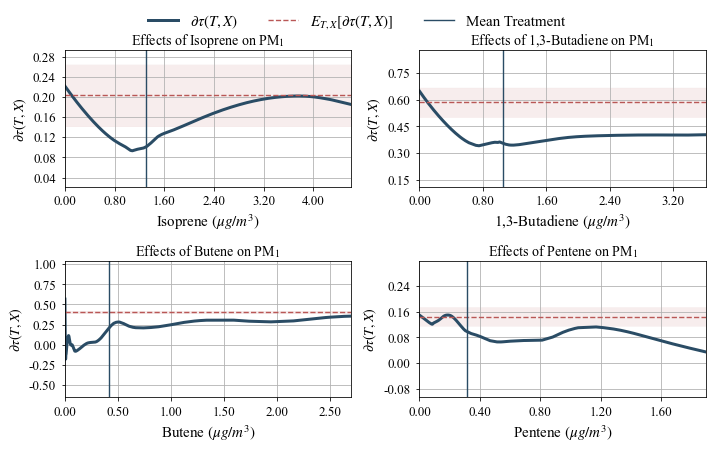

In [16]:
from statsmodels.nonparametric.smoothers_lowess import lowess
from matplotlib.ticker import FuncFormatter, MaxNLocator

Xgroup = pd.DataFrame(StandardScaler().fit_transform(grouped_data[Xname]), columns=Xname)
Tgroup = grouped_data[Tname]

# 获取每个观察值的处理效应
effects = estimator.marginal_effect(X=Xgroup, T=Tgroup)

# 计算ATE和置信区间
ate = estimator.marginal_ate(X=Xgroup, T=Tgroup)
lb, ub = estimator.marginal_ate_interval(X=Xgroup, T=Tgroup, alpha=0.05)



# 计算T的均值和标准差
T_mean = Tgroup.mean()
T_std = Tgroup.std()
T_min = Tgroup.min()
# 创建子图，每个T对应一个子图，X的值不在图上显示
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

for i, ax in enumerate(axes.flatten()):
    # 确定T的取值范围，取均值正负两个标准差
    t_min = 0
    t_max = T_mean[i] + 2 * T_std[i]

    # 对 Xgroup、effects、lb 和 ub 进行排序
    sorted_indices = Tgroup[Tname[i]].argsort()
    sorted_x = Tgroup[Tname[i]].iloc[sorted_indices]
    sorted_effects = effects[sorted_indices, :]

    # 使用LOWESS进行平滑
    smoothed = lowess(sorted_effects[:, i], sorted_x)

    # 散点图
    # ax.scatter(sorted_x, sorted_effects[:, i], c='#A1B0AD', marker='s', alpha=0.1)
    ax.plot(smoothed[:, 0], smoothed[:, 1], color='#2A4C65', linewidth=3,label='$\partial τ(T, X)$')  # 平滑的均值线

    ax.set_title(f'Effects of {Tname[i]} on PM$_1$', fontsize=14)
    ax.set_xlabel(f'{Tname[i]}'+' $(μg/m^3)$', fontsize=15)
    ax.set_ylabel('$\partial τ(T, X)$',fontsize=14)
    ax.set_xlim(t_min, t_max)  # 设置横坐标范围
    ax.tick_params(axis='both', labelsize=11)
    ax.grid(True)
    # 设置y轴范围为y正负两个标准差
    ax.set_ylim(smoothed[:, 1].min()-2*smoothed[:, 1].std(), smoothed[:, 1].max()+2*smoothed[:, 1].std())

    ax2 = ax
    ax2.set_xlim(t_min, t_max)  # 与原坐标轴范围一致
    ax2.axhline(y=ate[i], color='#B95756', linestyle='--', label='$E_{T, X}[\partial τ(T, X)]$')
    ax2.fill_between(sorted_x, lb[i], ub[i], color='#B95756', alpha=0.1)  # 置信区间

    ax.tick_params(axis='both', labelsize=13)
    ax.axvline(x=T_mean[i],label='Mean Treatment', color='#2A4C65')

    def format_ticks(x, pos):
        return f'{x:.2f}'  # 这里设置为保留两位小数，您可以根据需要进行修改
    # 设置x轴刻度的格式
    ax.xaxis.set_major_formatter(FuncFormatter(format_ticks))
    ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=7))
    ax.xaxis.set_major_locator(MaxNLocator(nbins=6))



# 添加图例并设置位置在总图的顶端
from matplotlib.lines import Line2D
# 用于保存图例的自定义图例对象
custom_legend = [Line2D([0], [0], color='#2A4C65', linewidth=3, label='$\partial τ(T, X)$'),
                 Line2D([0], [0], color='#B95756', linestyle='--', label='$E_{T, X}[\partial τ(T, X)]$'),Line2D([0], [0],label='Mean Treatment', color='#2A4C65')]

# 在总图上添加图例，只显示一个图例
fig.legend(handles=custom_legend,frameon=False, fontsize=15, loc="upper center",ncol=3, bbox_to_anchor=(0.5, 1.05))
plt.tight_layout()
# plt.subplots_adjust(top=0.90)
plt.savefig('Effects_of_T_on_PM1.svg', bbox_inches='tight')
plt.show()

In [15]:
# 初始化存储效应估计和置信区间的列表
all_point_estimates = []
all_lower_bounds = []
all_upper_bounds = []

Xgroup = pd.DataFrame(StandardScaler().fit_transform(grouped_data[Xname]), columns=Xname)
TSindex=[]

# 遍历每个T进行推断
for tname in Tname:
    # 设定T的范围：从0到均值加两个标准差
    T0 = 0
    T1 = T0 + T[tname].mean()+2*T[tname].std() # 均值加两个标准差
    Ts = np.arange(T0, T1, (T1-T0)/20)  # 设定步长为20
    TSindex.append(Ts)

    point_estimates = []
    lower_bounds = []
    upper_bounds = []

    for T_val in Ts:
        # 设定当前T为T_val，其它T设为0
        T_current = np.zeros(len(Tname))
        T_current[Tname.index(tname)] = T_val

        # 重复T0和T1以匹配X的长度
        repeated_T0 = np.tile([0, 0, 0, 0], (Xgroup.shape[0], 1))
        repeated_T_current = np.tile(T_current, (Xgroup.shape[0], 1))

        results = estimator.effect_inference(Xgroup, T0=repeated_T0, T1=repeated_T_current)


      # 存储估计的效应和其置信区间
        point_estimates.append(np.mean(results.point_estimate))
        conf_intervals = results.conf_int()
        lb = np.mean(conf_intervals[0])
        ub = np.mean(conf_intervals[1])
        lower_bounds.append(lb)
        upper_bounds.append(ub)

    all_point_estimates.append(point_estimates)
    all_lower_bounds.append(lower_bounds)
    all_upper_bounds.append(upper_bounds)

In [16]:

fig, axes = plt.subplots(2, 2, figsize=(15, 8))
axes = axes.ravel()  # 将 2x2 的子图数组转换为1维，以方便迭代
for idx, tname in enumerate(Tname):
    ax = axes[idx]
        # 绘制置信区间的填充
    ax.fill_between(TSindex[idx], all_lower_bounds[idx], all_upper_bounds[idx], color='#ABD5E6', label='95% Confidence Interval')

    # 绘制效应估计
    ax.plot(TSindex[idx], all_point_estimates[idx], label=tname, color='#264653', marker='o', markersize=8, linewidth=2)

    # 设置标题、标签和网格
    ax.set_title(f'Treatment Effects of {tname}', fontsize=16)
    ax.set_xlabel('Treatment Value ($μg/m^3$)', fontsize=14)
    ax.set_ylabel(f'$τ(X, T_0=0, T_1=Treatment$ $Value))$', fontsize=14)
    ax.axhline(y=0, color='black', linestyle='--', linewidth=1.5)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.legend(frameon=False, fontsize=12, loc="upper left")
    ax.tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.savefig("处置效应推断.svg")
plt.show()

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [26]:

# # Your data preparation code
# het_inds = np.arange(len(Xname) - len(Tname), len(Xname))
#
# # Confidence intervals
# conf_ints_intercept = estimator.intercept__interval(alpha=0.05)
# conf_ints_coef = estimator.coef__interval(alpha=0.05)
#
# # Confidence intervals for 5%, 1%, and 0.1%
# conf_ints_intercept_05, conf_ints_intercept_01, conf_ints_intercept_001 = estimator.intercept__interval(alpha=0.05), estimator.intercept__interval(alpha=0.01), estimator.intercept__interval(alpha=0.001)
# conf_ints_coef_05, conf_ints_coef_01, conf_ints_coef_001 = estimator.coef__interval(alpha=0.05), estimator.coef__interval(alpha=0.01), estimator.coef__interval(alpha=0.001)
#
#
# # concatenating intercept and coef_
# param_hat = np.hstack([estimator.intercept_.reshape(-1, 1), estimator.coef_])
# lower = np.hstack([conf_ints_intercept[0].reshape(-1, 1), conf_ints_coef[0]])
# upper = np.hstack([conf_ints_intercept[1].reshape(-1, 1), conf_ints_coef[1]])
#
# lower_05 = np.hstack([conf_ints_intercept_05[0].reshape(-1, 1), conf_ints_coef_05[0]])
# upper_05 = np.hstack([conf_ints_intercept_05[1].reshape(-1, 1), conf_ints_coef_05[1]])
#
# lower_01 = np.hstack([conf_ints_intercept_01[0].reshape(-1, 1), conf_ints_coef_01[0]])
# upper_01 = np.hstack([conf_ints_intercept_01[1].reshape(-1, 1), conf_ints_coef_01[1]])
#
# lower_001 = np.hstack([conf_ints_intercept_001[0].reshape(-1, 1), conf_ints_coef_001[0]])
# upper_001 = np.hstack([conf_ints_intercept_001[1].reshape(-1, 1), conf_ints_coef_001[1]])
#
# # Getting the number of treatments and heterogeneity indicators
# n_treatments = param_hat.shape[0]
# n_hetero_inds = param_hat.shape[1] - 1
#
# # Setting up plot colors
# colors = ['#4A7056', '#8E9BAE', '#C5AB89', '#A08887']
#
# # Start plotting
# plt.figure(figsize=(13, 5))
#
# yp=0.9*plt.gca().get_ylim()[1]
# # Loop over treatments
# for t in range(n_treatments):
#     start_idx = t * (1 + n_hetero_inds)
#     end_idx = start_idx + (1 + n_hetero_inds)
#
#     # Loop over intercept + heterogeneity indicators for each treatment
#     for idx in range(start_idx, end_idx):
#         y_val = param_hat[idx // (1 + n_hetero_inds), idx % (1 + n_hetero_inds)]
#         y_lower = y_val - lower[idx // (1 + n_hetero_inds), idx % (1 + n_hetero_inds)]
#         y_upper = upper[idx // (1 + n_hetero_inds), idx % (1 + n_hetero_inds)] - y_val
#
#         plt.errorbar([idx], [y_val], yerr=[[y_lower], [y_upper]], fmt='o', color=colors[t], label=Tname[t] if idx == start_idx else "",
#              markersize=10, capsize=5, elinewidth=3)
#
#         # Determine significance level
#         if lower_001[idx // (1 + n_hetero_inds), idx % (1 + n_hetero_inds)] > 0 or upper_001[idx // (1 + n_hetero_inds), idx % (1 + n_hetero_inds)] < 0:
#             significance = "***"
#         elif lower_01[idx // (1 + n_hetero_inds), idx % (1 + n_hetero_inds)] > 0 or upper_01[idx // (1 + n_hetero_inds), idx % (1 + n_hetero_inds)] < 0:
#             significance = "**"
#         elif lower_05[idx // (1 + n_hetero_inds), idx % (1 + n_hetero_inds)] > 0 or upper_05[idx // (1 + n_hetero_inds), idx % (1 + n_hetero_inds)] < 0:
#             significance = "*"
#         else:
#             significance = ""
#         plt.annotate(f"{y_val:.3f}{significance}", (idx, y_val), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)
#
#     # Display the treatment name in the middle of each treatment's set of points
#     plt.text((start_idx + end_idx) / 2-0.5, yp, Tname[t], ha='center', va='top', fontsize=15,weight='bold')
#
# # 移除每个子图的上和右边框
# ax = plt.gca()  # 获取当前的轴
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
#
#
# # 在每个处理之间添加垂直线
# for i in range(1, n_treatments):
#     plt.axvline(x=i * (1 + n_hetero_inds) - 0.5, color='grey', linestyle='--')
#
# # Set x-axis labels and other plot attributes
# x_labels = ["Intercept"] + Xcolname
# x_labels = x_labels * n_treatments
# plt.xticks(np.arange(n_treatments * (1 + n_hetero_inds)), x_labels, rotation=45,fontsize=12)
# plt.yticks(fontsize=12)
# plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
# plt.xlim(-0.6,(n_treatments+1)*n_hetero_inds-2.4)
# plt.ylabel("$θ_X$",fontsize=15)
# plt.xlabel("$X$",fontsize=14)
# plt.grid(linestyle='--',alpha=0.5)
# # plt.legend()
# plt.tight_layout()
# plt.savefig("coef.svg")
# plt.show()

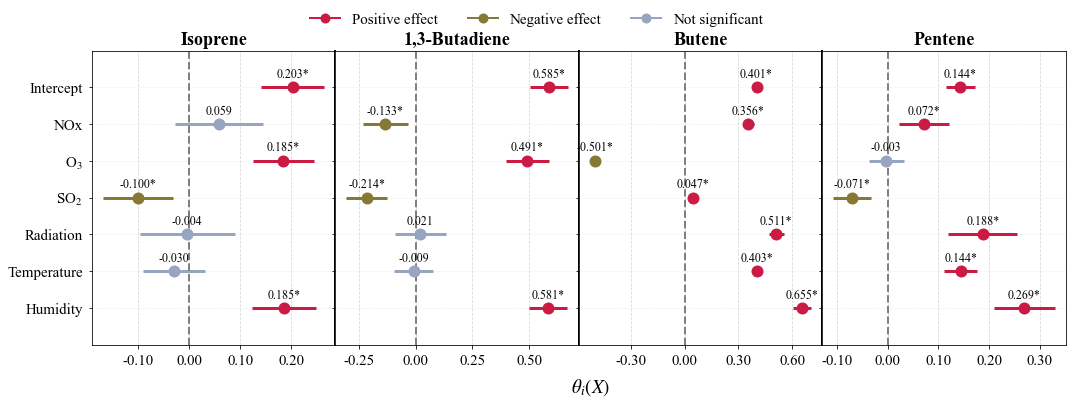

In [38]:
# import re
#
# # Assuming summary_output is the text output from estimator.summary()
# summary_output = str(estimator.summary())
#
#
# # Extract p-values from any line that matches the expected format
# p_values_matches = re.findall(r".+\s+[\d.-]+\s+[\d.-]+\s+[\d.-]+\s+([\d.-]+)\s+[\d.-]+\s+[\d.-]+", summary_output)
#
# # Convert extracted strings to floats
# all_p_values = [float(p) for p in p_values_matches]
#
# n_T = len(Tname)  # number of T values
# grouped_p_values = [[] for _ in range(n_T)]
#
# for idx, value in enumerate(all_p_values):
#     grouped_p_values[idx % n_T].append(value)


# Your data preparation code
het_inds = np.arange(len(Xname) - len(Tname), len(Xname))

# Confidence intervals
conf_ints_intercept = estimator.intercept__interval(alpha=0.05)
conf_ints_coef = estimator.coef__interval(alpha=0.05)

# Confidence intervals for 5%, 1%, and 0.1%
conf_ints_intercept_05, conf_ints_intercept_01, conf_ints_intercept_001 = estimator.intercept__interval(alpha=0.05), estimator.intercept__interval(alpha=0.01), estimator.intercept__interval(alpha=0.001)
conf_ints_coef_05, conf_ints_coef_01, conf_ints_coef_001 = estimator.coef__interval(alpha=0.05), estimator.coef__interval(alpha=0.01), estimator.coef__interval(alpha=0.001)


# concatenating intercept and coef_
param_hat = np.hstack([estimator.intercept_.reshape(-1, 1), estimator.coef_])
lower = np.hstack([conf_ints_intercept[0].reshape(-1, 1), conf_ints_coef[0]])
upper = np.hstack([conf_ints_intercept[1].reshape(-1, 1), conf_ints_coef[1]])

lower_05 = np.hstack([conf_ints_intercept_05[0].reshape(-1, 1), conf_ints_coef_05[0]])
upper_05 = np.hstack([conf_ints_intercept_05[1].reshape(-1, 1), conf_ints_coef_05[1]])

lower_01 = np.hstack([conf_ints_intercept_01[0].reshape(-1, 1), conf_ints_coef_01[0]])
upper_01 = np.hstack([conf_ints_intercept_01[1].reshape(-1, 1), conf_ints_coef_01[1]])

lower_001 = np.hstack([conf_ints_intercept_001[0].reshape(-1, 1), conf_ints_coef_001[0]])
upper_001 = np.hstack([conf_ints_intercept_001[1].reshape(-1, 1), conf_ints_coef_001[1]])

# Getting the number of treatments and heterogeneity indicators
n_treatments = param_hat.shape[0]
n_hetero_inds = param_hat.shape[1] - 1


# Colors for significance
significance_colors = {
    'positive': '#CB1B45',
    'negative': '#867835',
    'neutral': '#97A5C0'
}

# Set up the plot grid
fig, axes = plt.subplots(nrows=1, ncols=n_treatments, figsize=(15, 6), sharey=True)

# Loop over treatments
for t, ax in enumerate(axes):
    # Loop over intercept + heterogeneity indicators for each treatment
    for idx in range(n_hetero_inds + 1):
        actual_idx = t * (1 + n_hetero_inds) + idx
        y_val = param_hat[t, idx]
        y_lower = y_val - lower[t, idx]
        y_upper = upper[t, idx] - y_val

        # Determine significance level and color
        if lower_05[t, idx] > 0:
            point_color = significance_colors['positive']
            significance = "*"
        elif upper_05[t, idx] < 0:
            point_color = significance_colors['negative']
            significance = "*"
        else:
            point_color = significance_colors['neutral']
            significance = ""

        ax.errorbar(y_val, n_hetero_inds - idx, xerr=[[y_lower], [y_upper]], fmt='o', color=point_color,
                    markersize=12, capsize=5, elinewidth=3)

        ax.annotate(f"{y_val:.3f}{significance}", (y_val, n_hetero_inds - idx), textcoords="offset points",
                    xytext=(0,10), ha='center', fontsize=12)

    ax.axvline(0, color='gray', linestyle='--', linewidth=2)
    ax.set_title(Tname[t], fontsize=18, weight='bold')
    ax.set_yticks(np.arange(n_hetero_inds + 1))
    x_labels = ["Intercept"] + Xcolname
    x_labels.reverse()
    ax.set_yticklabels(x_labels, fontsize=14)  # Reverse order for y-axis
    ax.grid(linestyle='--', alpha=0.5,axis='x')
    ax.grid(linestyle=':', alpha=0.3,axis='y')
    ax.tick_params(axis='x', labelsize=14)
    ax.set_ylim(-1,len(Xcolname)+1)

       #设置刻度
    ax.tick_params(axis='both', labelsize=15)

    def format_ticks(x, pos):
        return f'{x:.2f}'  # 这里设置为保留两位小数，您可以根据需要进行修改
    # 设置x轴刻度的格式
    ax.xaxis.set_major_formatter(FuncFormatter(format_ticks))
    ax.xaxis.set_major_locator(MaxNLocator(nbins=5.5))

    if t!=3:
        ax.spines['right'].set_linewidth(2)


# Create a legend
legend_labels = ["Positive effect", "Negative effect", "Not significant"]

handles = [plt.Line2D([0, 1], [0.5, 0.5], marker='o', color=significance_colors[color_key], label=legend_labels[i],
                      markersize=10, lw=2) for i, color_key in enumerate(['positive', 'negative', 'neutral'])]
fig.legend(handles=handles, frameon=False, fontsize=15, loc="upper center", ncol=3, bbox_to_anchor=(0.5, 1.05))

fig.text(0.55, 0.14, '$θ_i(X)$', ha='center', fontsize=19)
plt.tight_layout()
plt.subplots_adjust(wspace=0, bottom=0.25)  # Adjust space between subplots and bottom padding for legend
plt.savefig("coef2.svg", bbox_inches='tight')
plt.show()

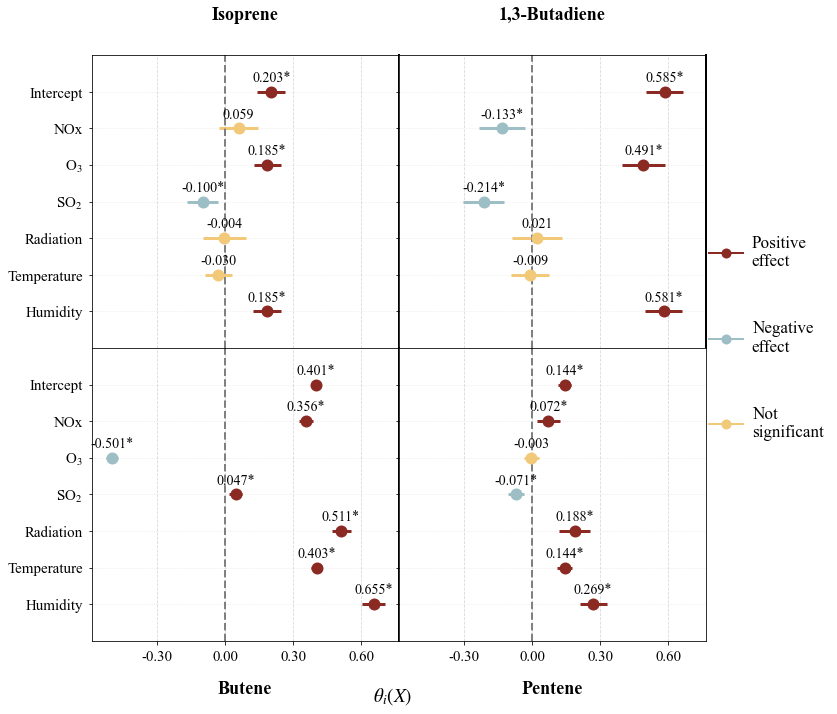

In [45]:
# Your data preparation code
het_inds = np.arange(len(Xname) - len(Tname), len(Xname))

# Confidence intervals
conf_ints_intercept = estimator.intercept__interval(alpha=0.05)
conf_ints_coef = estimator.coef__interval(alpha=0.05)

# Confidence intervals for 5%, 1%, and 0.1%
conf_ints_intercept_05, conf_ints_intercept_01, conf_ints_intercept_001 = estimator.intercept__interval(alpha=0.05), estimator.intercept__interval(alpha=0.01), estimator.intercept__interval(alpha=0.001)
conf_ints_coef_05, conf_ints_coef_01, conf_ints_coef_001 = estimator.coef__interval(alpha=0.05), estimator.coef__interval(alpha=0.01), estimator.coef__interval(alpha=0.001)


# concatenating intercept and coef_
param_hat = np.hstack([estimator.intercept_.reshape(-1, 1), estimator.coef_])
lower = np.hstack([conf_ints_intercept[0].reshape(-1, 1), conf_ints_coef[0]])
upper = np.hstack([conf_ints_intercept[1].reshape(-1, 1), conf_ints_coef[1]])

lower_05 = np.hstack([conf_ints_intercept_05[0].reshape(-1, 1), conf_ints_coef_05[0]])
upper_05 = np.hstack([conf_ints_intercept_05[1].reshape(-1, 1), conf_ints_coef_05[1]])

lower_01 = np.hstack([conf_ints_intercept_01[0].reshape(-1, 1), conf_ints_coef_01[0]])
upper_01 = np.hstack([conf_ints_intercept_01[1].reshape(-1, 1), conf_ints_coef_01[1]])

lower_001 = np.hstack([conf_ints_intercept_001[0].reshape(-1, 1), conf_ints_coef_001[0]])
upper_001 = np.hstack([conf_ints_intercept_001[1].reshape(-1, 1), conf_ints_coef_001[1]])

# Getting the number of treatments and heterogeneity indicators
n_treatments = param_hat.shape[0]
n_hetero_inds = param_hat.shape[1] - 1


# Colors for significance
significance_colors = {
    'positive': '#8A2A23',
    'negative': '#9CBEC4',
    'neutral': '#F2C879'
}

# Set up the plot grid - change to 2x2 grid, no space between subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 12), sharex=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop over treatments
for t in range(n_treatments):
    ax = axes[t]  # Select the appropriate subplot

    # Loop over intercept + heterogeneity indicators for each treatment
    for idx in range(n_hetero_inds + 1):
        actual_idx = t * (1 + n_hetero_inds) + idx
        y_val = param_hat[t, idx]
        y_lower = y_val - lower[t, idx]
        y_upper = upper[t, idx] - y_val

        # Determine significance level and color
        if lower_05[t, idx] > 0:
            point_color = significance_colors['positive']
            significance = "*"
        elif upper_05[t, idx] < 0:
            point_color = significance_colors['negative']
            significance = "*"
        else:
            point_color = significance_colors['neutral']
            significance = ""

        ax.errorbar(y_val, n_hetero_inds - idx, xerr=[[y_lower], [y_upper]], fmt='o', color=point_color,
                    markersize=12, capsize=5, elinewidth=3)

        ax.annotate(f"{y_val:.3f}{significance}", (y_val, n_hetero_inds - idx), textcoords="offset points",
                    xytext=(0,10), ha='center', fontsize=14)

    ax.axvline(0, color='gray', linestyle='--', linewidth=2)
    if t in [0, 1]:  # Titles for the first and second subplots
        ax.set_title(Tname[t], fontsize=18, weight='bold', y=1.1)  # Adjust title position
    else:  # Titles for the third and fourth subplots
        ax.set_title(Tname[t], fontsize=18, weight='bold', y=-0.2)  # Adjust title position

    ax.set_yticks(np.arange(n_hetero_inds + 1))
    x_labels = ["Intercept"] + Xcolname
    x_labels.reverse()
    ax.set_yticklabels(x_labels, fontsize=14)  # Reverse order for y-axis
    ax.grid(linestyle='--', alpha=0.5, axis='x')
    ax.grid(linestyle=':', alpha=0.3, axis='y')
    ax.tick_params(axis='x', labelsize=16)
    ax.set_ylim(-1, len(Xcolname) + 1)

    # 设置刻度
    ax.tick_params(axis='both', labelsize=15)

    def format_ticks(x, pos):
        return f'{x:.2f}'  # 设置为保留两位小数
    ax.xaxis.set_major_formatter(FuncFormatter(format_ticks))
    ax.xaxis.set_major_locator(MaxNLocator(nbins=5.5))

    if t != n_treatments - 1:
        ax.spines['right'].set_linewidth(2)

    if t in [1, 3]:  # Remove y-axis labels for the second and fourth subplots
        ax.set_yticklabels([])

# Adjust subplot parameters
plt.tight_layout()

# Create a legend
legend_labels = ["Positive\neffect", "Negative\neffect", "Not\nsignificant"]
handles = [plt.Line2D([0, 1], [0.5, 0.5], marker='o', color=significance_colors[color_key], label=legend_labels[i],
                      markersize=10, lw=2) for i, color_key in enumerate(['positive', 'negative', 'neutral'])]
fig.legend(handles=handles, frameon=False, fontsize=17, loc="center right",
           ncol=1, bbox_to_anchor=(1.17, 0.6), handletextpad=0.5, columnspacing=1, labelspacing=3)

fig.text(0.55, 0.18, '$θ_i(X)$', ha='center', fontsize=19)
plt.subplots_adjust(wspace=0, bottom=0.25)  # Adjust space between subplots and bottom padding for legend
plt.savefig("coef3.svg", bbox_inches='tight')
plt.savefig("coef3.jpg", bbox_inches='tight', dpi=800)
plt.show()

In [ ]:
import itertools
# Assuming you have your data X, Y, T available
feature_names = Xcolname

# Create all possible combinations of feature values (assuming binary features for simplicity)
lst = list(itertools.product([0, 1], repeat=len(feature_names)))

# Loop over all treatments
for treatment in Tname:
    treatment_idx = Tname.index(treatment)
    point = []
    lower = []
    upper = []
    fnames = []

    # Loop over all combinations and compute effects and their intervals
    for x in lst:
        x_test = np.array([x])
        # Use ":" instead of " " for joining the feature names
        fnames.append(" : ".join(np.array(feature_names)[x_test.flatten() > 0]))

        # Using const_marginal_effect instead of effect
        effect_values = estimator.const_marginal_effect(x_test)
        interval_values = estimator.const_marginal_effect_interval(x_test, alpha=0.05)

        point.append(effect_values[0][treatment_idx])
        lower.append(interval_values[0][0][treatment_idx])
        upper.append(interval_values[1][0][treatment_idx])

    fnames[0]='Intercept'
    fnames = np.array(fnames)
    point = np.array(point)
    lower = np.array(lower)
    upper = np.array(upper)
    yerr = np.zeros((2, point.shape[0]))
    yerr[0, :] = point - lower
    yerr[1, :] = upper - point

    # Plotting
    fig, ax = plt.subplots(1,1, figsize=(19, 10))
    ax.grid(True, which='both')
    ax.axhline(y=0, color='k')

    x = np.arange(len(point))
    stat_sig = (lower > 0) | (upper < 0)
    plt.errorbar(x[stat_sig], point[stat_sig], yerr[:, stat_sig], fmt='o', label='stat_sig',
             markersize=13, capsize=5, elinewidth=3,color="#75809C")
    plt.errorbar(x[~stat_sig], point[~stat_sig], yerr[:, ~stat_sig], fmt='s', color='#B95756', label='insig',
             markersize=13, capsize=5, elinewidth=3)

    # Add numbers on top of each point
    for i, txt in enumerate(point):
        ax.text(x[i], point[i] + 0.01, str(round(txt, 3)), ha='center', fontsize=12)

    ax.set_xticks(x)
    ax.set_xticklabels(fnames, rotation='vertical', fontsize=16)
    ax.set_ylabel('$θ(X)$',fontsize=16)
    ax.set_title(f"{treatment} CATE(x) intervals", fontsize=18)
    ax.tick_params(axis='y', labelsize=14)
    legend = plt.legend(frameon=False, fontsize=15, loc="upper center",ncol=2)
    plt.tight_layout()
    plt.savefig(f"{treatment} $θ(X)$ intervals.svg")
    plt.show()

In [19]:
import itertools

def plotinterraction(name1,name2,cmap):
    interest_vars=[name1, name2]
    # Assuming you have your data X, Y, T available
    feature_names = Xname

    fig, axes = plt.subplots(2, 2, figsize=(12, 9))
    # fig.suptitle(f"CATE(x) intervals for Different Treatments", fontsize=18)

    # Loop over all treatments
    for i, treatment in enumerate(Tname):
        treatment_idx = Tname.index(treatment)
        ax = axes[i // 2, i % 2]

        point = []
        lower = []
        upper = []
        fnames = []

        # Loop over all combinations and compute effects and their intervals
        for k in range(len(interest_vars) + 1):
            for subset in itertools.combinations(interest_vars, k):
                x_test = np.zeros(len(feature_names), dtype=int)
                for var in subset:
                    idx = feature_names.index(var)
                    x_test[idx] = 1

                feature_combination = " : ".join(np.array(Xcolname)[x_test > 0])
                fnames.append(feature_combination)

                effect_values = estimator.const_marginal_effect([x_test])
                interval_values = estimator.const_marginal_effect_interval([x_test], alpha=0.05)

                point.append(effect_values[0][treatment_idx])
                lower.append(interval_values[0][0][treatment_idx])
                upper.append(interval_values[1][0][treatment_idx])

        fnames[0] = 'Intercept'

        # Sorting based on the point values
        sort_idx = np.argsort(point)
        fnames = np.array(fnames)[sort_idx]
        point = np.array(point)[sort_idx]
        lower = np.array(lower)[sort_idx]
        upper = np.array(upper)[sort_idx]
        yerr = np.zeros((2, point.shape[0]))
        yerr[0, :] = point - lower
        yerr[1, :] = upper - point

        ax.grid(True, which='both')
        ax.axhline(y=0, color='k')

        x = np.arange(len(point))
        stat_sig = (lower > 0) | (upper < 0)
        ax.errorbar(x[stat_sig], point[stat_sig], yerr[:, stat_sig], fmt='o', label='stat_sig',
                     markersize=13, capsize=5, elinewidth=3, color="#75809C")
        ax.errorbar(x[~stat_sig], point[~stat_sig], yerr[:, ~stat_sig], fmt='s', color='#B95756', label='insig',
                     markersize=13, capsize=5, elinewidth=3)

        for j, txt in enumerate(point):
            ax.text(x[j], point[j] + 0.01, str(round(txt, 3)), ha='center', fontsize=16)

        ax.set_xticks(x)
        ax.set_xticklabels(fnames, rotation=24, fontsize=16)
        ax.set_ylabel('$\partial τ(T, X)$', fontsize=16)
        ax.tick_params(axis='y', labelsize=14)
        ax.set_title(f"{treatment} $\partial τ(T, X)$ intervals", fontsize=18)
        ax.set_xlim(-1,len(fnames))

    plt.tight_layout()
    plt.subplots_adjust(top=0.90)

    from matplotlib.lines import Line2D
    # Define legend elements with vertical line lengths
    legend_elements = [Line2D([0.5, 0.5], [0, 1], marker='o', color="#75809C", markersize=10, label='stat_sig'),
                       Line2D([0.5, 0.5], [0, 1], marker='s', color="#B95756", markersize=10, label='insig')]
    fig.legend(handles=legend_elements, frameon=False, fontsize=15, loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1))
    plt.savefig(f'{interest_vars[0]}和{interest_vars[1]}交互区分BVOCs.svg', bbox_inches='tight')
    plt.show()

    # Assuming you have your data X, Y, T available
    feature_names = Xname

    all_points = []
    all_lowers = []
    all_uppers = []
    fnames = []

    # Loop over all combinations and compute effects and their intervals
    for k in range(len(interest_vars) + 1):
        for subset in itertools.combinations(interest_vars, k):
            x_test = np.zeros(len(feature_names), dtype=int)
            for var in subset:
                idx = feature_names.index(var)
                x_test[idx] = 1

            feature_combination = " : ".join(np.array(Xcolname)[x_test > 0])
            fnames.append(feature_combination)

            # Collecting effects for all treatments
            point_treatments = []
            lower_treatments = []
            upper_treatments = []
            for treatment_idx in range(len(Tname)):
                effect_values = estimator.const_marginal_effect([x_test])
                interval_values = estimator.const_marginal_effect_interval([x_test], alpha=0.05)
                point_treatments.append(effect_values[0][treatment_idx])
                lower_treatments.append(interval_values[0][0][treatment_idx])
                upper_treatments.append(interval_values[1][0][treatment_idx])

            # Averaging over all treatments
            all_points.append(np.mean(point_treatments))
            all_lowers.append(np.mean(lower_treatments))
            all_uppers.append(np.mean(upper_treatments))

    fnames[0] = 'Intercept'

    # Sorting based on the point values
    sort_idx = np.argsort(all_points)
    fnames = np.array(fnames)[sort_idx]
    all_points = np.array(all_points)[sort_idx]
    all_lowers = np.array(all_lowers)[sort_idx]
    all_uppers = np.array(all_uppers)[sort_idx]
    yerr = np.zeros((2, len(all_points)))
    yerr[0, :] = all_points - all_lowers
    yerr[1, :] = all_uppers - all_points

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.grid(True, which='both')
    # plt.axhline(y=0, color='k')
    x = np.arange(len(all_points))
    stat_sig = (all_lowers > 0) | (all_uppers < 0)
    plt.errorbar(x[stat_sig], all_points[stat_sig], yerr[:, stat_sig], fmt='o', label='stat_sig',
                 markersize=13, capsize=5, elinewidth=3, color="#75809C")
    plt.errorbar(x[~stat_sig], all_points[~stat_sig], yerr[:, ~stat_sig], fmt='s', color='#B95756', label='insig',
                 markersize=13, capsize=5, elinewidth=3)

    # Annotate with the value
    for j, txt in enumerate(all_points):
        plt.text(x[j], all_points[j] + 0.01, str(round(txt, 3)), ha='center', fontsize=12)

    plt.xticks(x, fnames, rotation=24, fontsize=16)
    plt.ylabel('$\partial τ(T, X)$', fontsize=16)
    plt.tick_params(axis='y', labelsize=14)
    plt.title('Average $\partial τ(T, X)$ of BVOCs', fontsize=18)
    plt.xlim(-0.6,len(x)-0.3)

    from matplotlib.lines import Line2D
    # Define legend elements with vertical line lengths
    legend_elements = [Line2D([0.5, 0.5], [0, 1], marker='o', color="#75809C", markersize=10, label='stat_sig'),
                       Line2D([0.5, 0.5], [0, 1], marker='s', color="#B95756", markersize=10, label='insig')]
    plt.legend(handles=legend_elements, frameon=False, fontsize=15, loc="upper center", ncol=2)

    plt.tight_layout()
    plt.savefig(f'{interest_vars[0]}和{interest_vars[1]}交互平均.svg', bbox_inches='tight')
    plt.show()

    Xgroup = pd.DataFrame(StandardScaler().fit_transform(grouped_data[Xname]), columns=Xname)
    Tgroup=grouped_data[Tname]


    # 选择两个特征的名称
    selected_features = interest_vars
    var1=Xname.index(selected_features[0])
    var2=Xname.index(selected_features[1])
    # 创建一个新的Xgroup，只包含两个特征，其他特征设定为0
    Xgroup_selected = Xgroup.copy()




    for feature in Xname:
        if feature not in selected_features:
            Xgroup_selected[feature] = 0

    # 计算这两个特征下的effects
    effects_selected = estimator.marginal_effect(X=Xgroup_selected, T=Tgroup)
    # 综合所有的T的结果
    average_effects = effects_selected.mean(axis=1)


    # 基于给定的数据点创建等高线图
    plt.figure(figsize=(8, 5))
    contour = plt.tricontourf(Xgroup[selected_features[0]], Xgroup[selected_features[1]], average_effects, cmap=cmap, levels=100)
    cbar = plt.colorbar(contour, label='Average $\partial τ(T, X)$ ', orientation='vertical')
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel('Average $\partial τ(T, X)$ ', fontsize=16)

    # 创建等高线
    contourf = plt.tricontour(Xgroup[selected_features[0]], Xgroup[selected_features[1]], average_effects, colors='black', linewidths=0.5, levels=25, linestyles='dotted')
    # 添加等高线的标签
    plt.clabel(contourf, inline=True, fontsize=13, colors='black', fmt='%1.2f')

    plt.xlabel(f'{Xcolname[i]}', fontsize=16)
    plt.ylabel(f'{Xcolname[j]}', fontsize=16)
    plt.title('Average $\partial τ(T, X)$ of BVOCs on Selected Heterogeneity Factors', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # 图形边框
    for spine in plt.gca().spines.values():
        spine.set_visible(True)
        spine.set_linewidth(0.5)

    # 设置背景颜色
    plt.gca().set_facecolor('#f2f2f2')  # 设置为浅灰色背景

    plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.6)

    plt.xlim(Xgroup[selected_features[0]].min()-0.5,Xgroup[selected_features[0]].max()+0.5)
    plt.ylim(Xgroup[selected_features[1]].min()-0.5,Xgroup[selected_features[1]].max()+0.5)

    plt.tight_layout()
    plt.savefig(f'{interest_vars[0]}和{interest_vars[1]}交互等高线.svg', bbox_inches='tight')
    plt.show()

    # Setting up the main figure and axes for the 2x1 subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # First subplot
    ax = axes[0]

    # Plotting the effects for the first subplot
    x = np.arange(len(all_points))
    stat_sig = (all_lowers > 0) | (all_uppers < 0)
    ax.errorbar(x[stat_sig], all_points[stat_sig], yerr[:, stat_sig], fmt='o', label='stat_sig',
                 markersize=13, capsize=5, elinewidth=3, color="#75809C")
    ax.errorbar(x[~stat_sig], all_points[~stat_sig], yerr[:, ~stat_sig], fmt='s', color='#B95756', label='insig',
                 markersize=13, capsize=5, elinewidth=3)

    for j, txt in enumerate(all_points):
        ax.text(x[j], all_points[j] + 0.01, str(round(txt, 3)), ha='center', fontsize=16)

    ax.set_xticks(x)
    ax.set_xticklabels(fnames, rotation=24, fontsize=16)
    ax.set_ylabel('$\partial τ(T, X)$', fontsize=16)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_title('Average $\partial τ(T, X)$ of BVOCs', fontsize=18)
    ax.set_xlim(-0.6,len(x)-0.3)
    ax.grid(True)

    # Second subplot
    ax = axes[1]

    # Plotting the contour for the second subplot
    contour = ax.tricontourf(Xgroup[selected_features[0]], Xgroup[selected_features[1]], average_effects, cmap=cmap, levels=100)
    cbar = fig.colorbar(contour, ax=ax, label='Average $\partial τ(T, X)$ ', orientation='vertical')
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel('Average $\partial τ(T, X)$ ', fontsize=16)

    contourf = ax.tricontour(Xgroup[selected_features[0]], Xgroup[selected_features[1]], average_effects, colors='black', linewidths=0.5, levels=25, linestyles='dotted')
    ax.clabel(contourf, inline=True, fontsize=13, colors='black', fmt='%1.2f')

    ax.set_xlabel(f'{Xcolname[var1]}', fontsize=16)
    ax.set_ylabel(f'{Xcolname[var2]}', fontsize=16)
    ax.set_title('Average $\partial τ(T, X)$ of BVOCs', fontsize=16)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(True, linestyle='--', linewidth=0.7, alpha=0.6)
    ax.set_facecolor('#f2f2f2')
    ax.set_xlim(Xgroup[selected_features[0]].min()-0.5,Xgroup[selected_features[0]].max()+0.5)
    ax.set_ylim(Xgroup[selected_features[1]].min()-0.5,Xgroup[selected_features[1]].max()+0.5)

    # Adjusting the layout
    # fig.tight_layout()
    plt.savefig(f'{interest_vars[0]}和{interest_vars[1]}交互双图.svg', bbox_inches='tight')
    # Displaying the plots
    plt.show()

In [10]:
print(Xcolname)

['NOx', 'O$_3$', 'SO$_2$', 'Radiation', 'Temperature', 'Humidity']


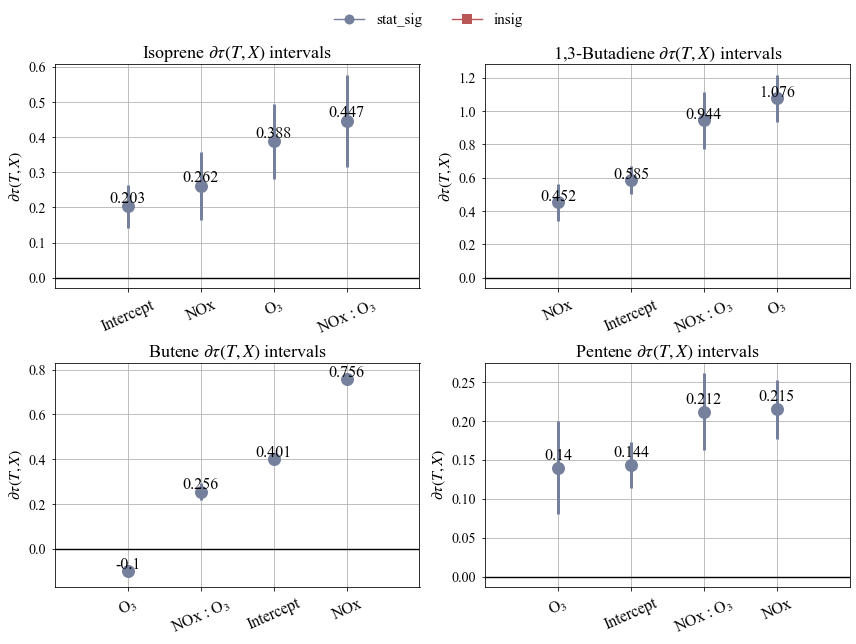

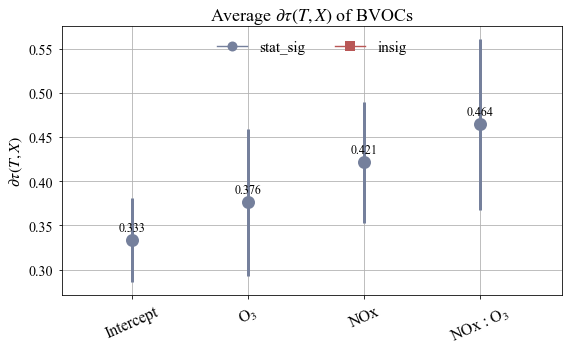

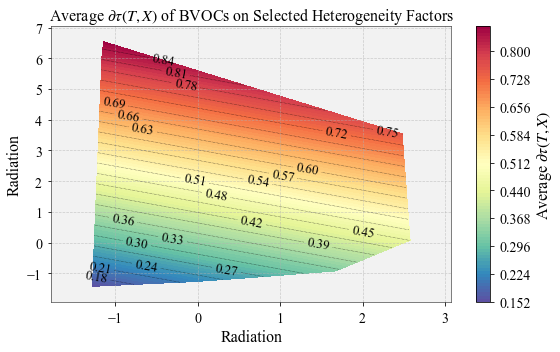

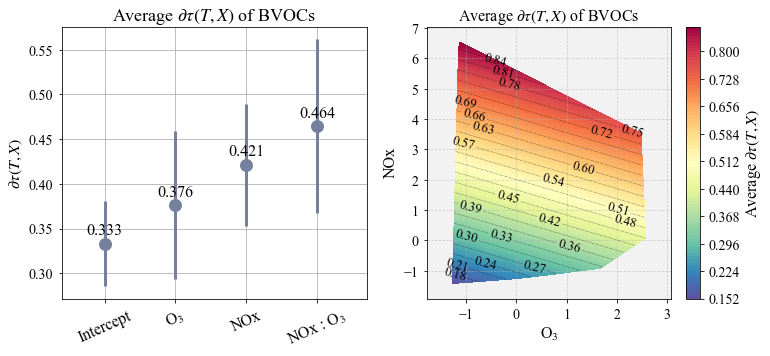

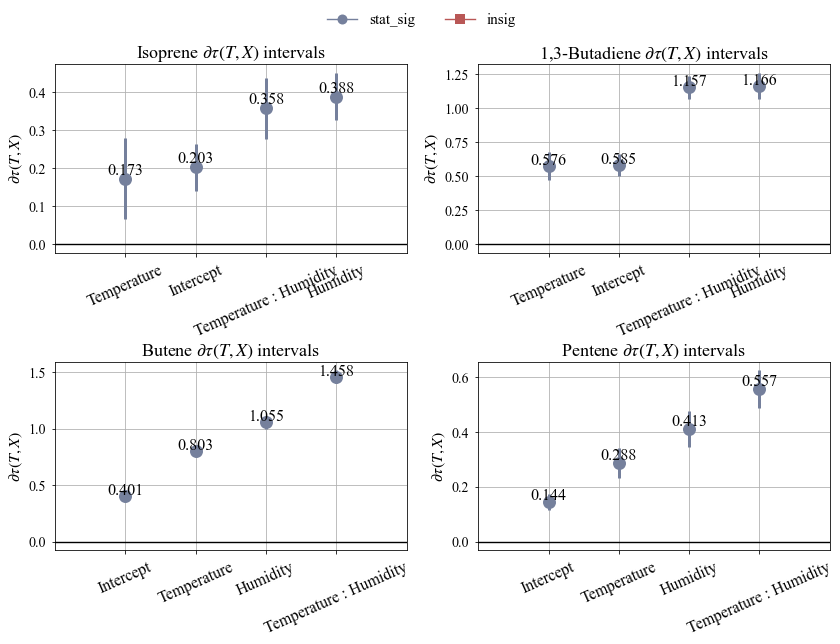

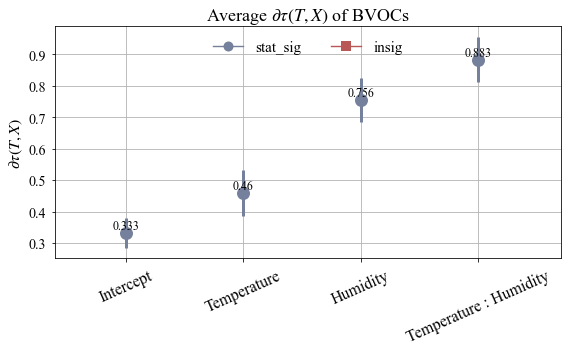

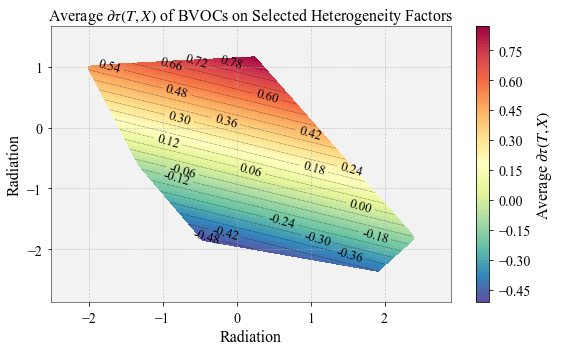

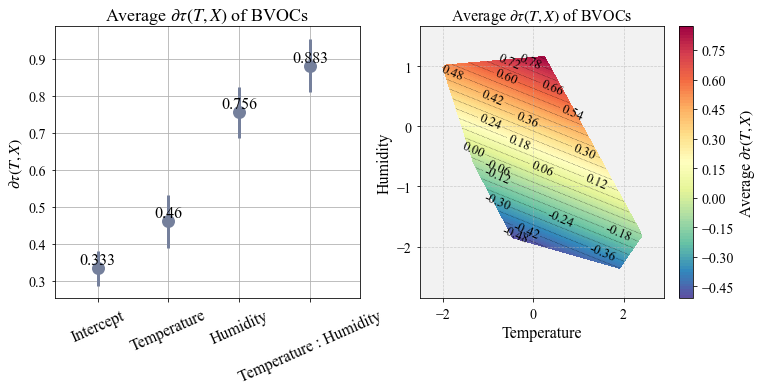

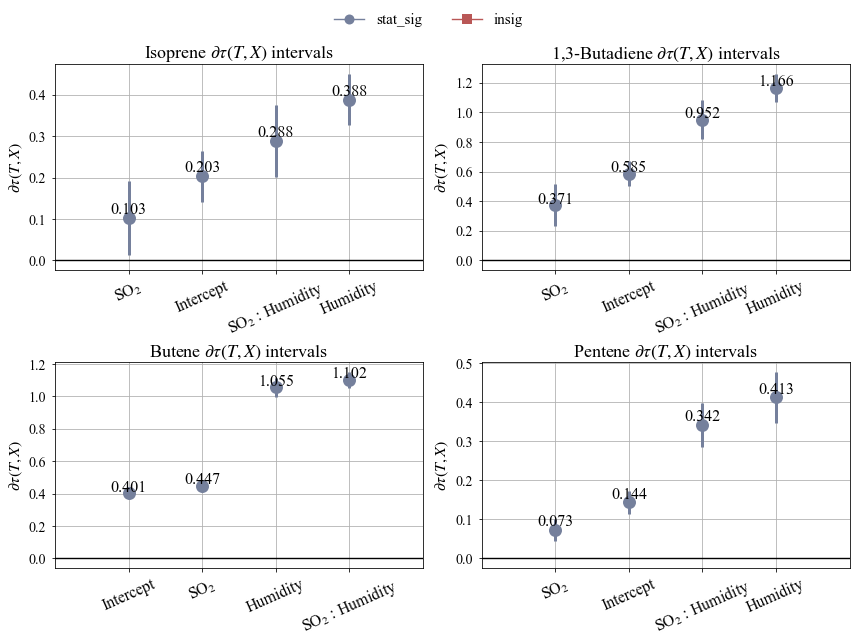

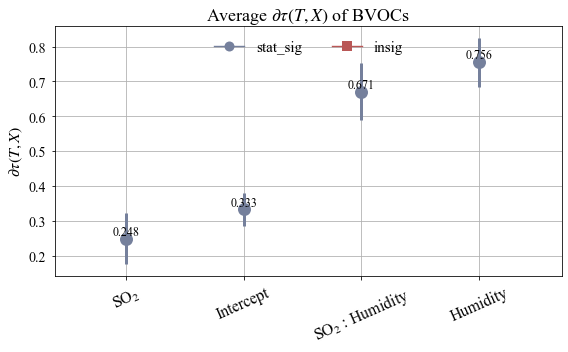

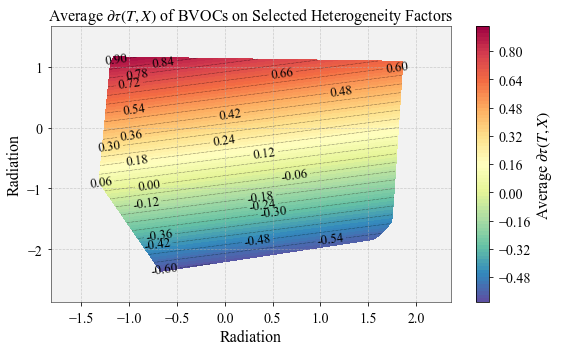

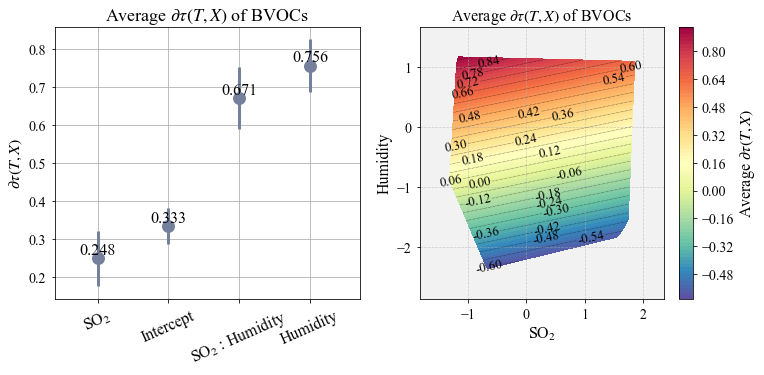

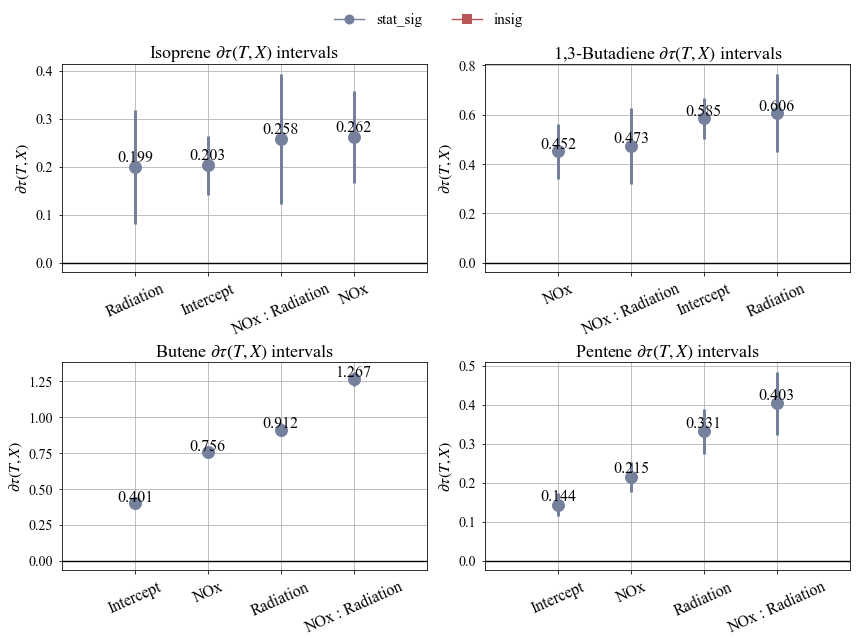

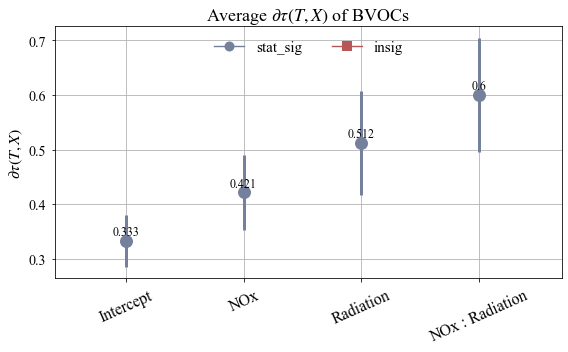

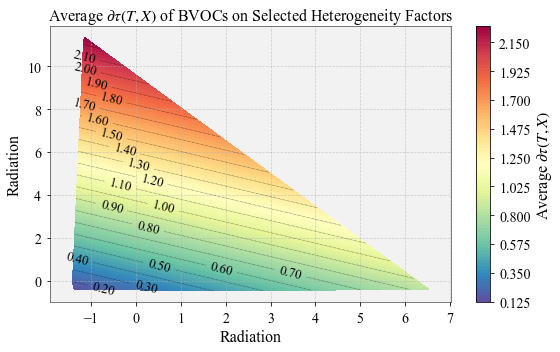

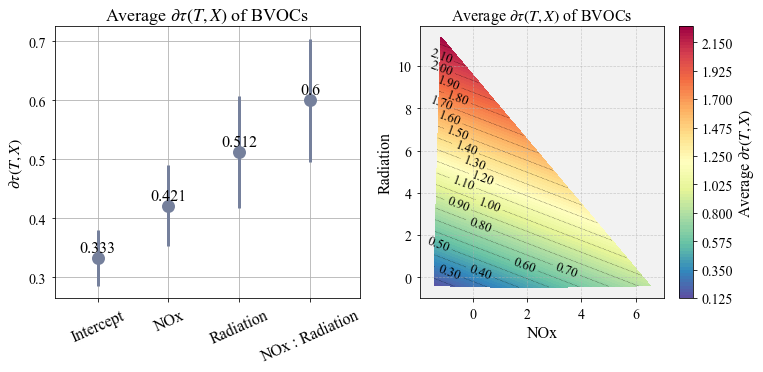

In [18]:
invar=[('O3', 'NOx'),('Temperature','Humidity'),('SO2','Humidity'),('NOx','Radiation')]

cmap_original = sns.color_palette("Spectral", as_cmap=True)
cmap_reversed = plt.cm.get_cmap(cmap_original.name + "_r")
for i in invar:
    plotinterraction(i[0], i[1],cmap=cmap_reversed)